### Importing required libraries

In [258]:
# import 'Numpy'
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import color package from matplotlib
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# import label encoder , ordinal encoder , onehot encoder 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

# import target encoder
from category_encoders import TargetEncoder, WOEEncoder

# import stats for performing statistical tests
import scipy.stats as stats

# import nltk
import nltk

# import wordlcoud, stopwords
from wordcloud import WordCloud,STOPWORDS

# import regular expression
import re

# import ast
import ast

# import train-test split
from sklearn.model_selection import train_test_split

# import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# import StandardScaler
from sklearn.preprocessing import StandardScaler

# import vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import Tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# import KNNimputer
from sklearn.impute import KNNImputer

# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# import SMOTE to create synthetic data
from imblearn.over_sampling import SMOTE

# import various functions from sklearn
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score

# import GridSearchCV
from sklearn.model_selection import KFold,GridSearchCV

# import statsmodels
import statsmodels.api as sma

# Import Kmeans
from sklearn.cluster import KMeans

# import Linear Regression
from sklearn.linear_model import LinearRegression

# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# import DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

# import tree to visualize DecisiontTree
from sklearn import tree

# import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# import AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

# import GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# import XtremeGradientBoost Classifier
from xgboost import XGBClassifier

# import Catboost Classifier
from catboost import CatBoostClassifier

#pickle
import pickle


In [259]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# Creating custom color
colors = ['#97c1ee','#DCDCDC','#ee9997','#eec497','#c1ee97','#86c5da','#97edee','#ee97c1','#9997ee','#97eec4']

### Reading the dataset and viewing the first 10 rows of it.

In [260]:
pd.set_option('display.max_columns',35)

df_airbnb = pd.read_csv('Listings.csv', encoding = 'iso-8859-1')

df_airbnb.head()

listing_id                                              name   host_id  \
0      281420    Beautiful Flat in le Village Montmartre, Paris   1466919   
1     3705183                   39 mÃÂ² Paris (Sacre CÃ
âur)  10328771   
2     4082273               Lovely apartment with Terrace, 60m2  19252768   
3     4797344               Cosy studio (close to Eiffel tower)  10668311   
4     4823489  Close to Eiffel Tower - Beautiful flat : 2 rooms  24837558   

   host_since                 host_location host_response_time  \
0  03-12-2011  Paris, Ile-de-France, France                NaN   
1  29-11-2013  Paris, Ile-de-France, France                NaN   
2  31-07-2014  Paris, Ile-de-France, France                NaN   
3  17-12-2013  Paris, Ile-de-France, France                NaN   
4  14-12-2014  Paris, Ile-de-France, France                NaN   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0                 NaN                   NaN                 f   
1                 NaN                   NaN                 f   
2                 NaN                   NaN                 f   
3                 NaN                   NaN                 f   
4                 NaN                   NaN                 f   

   host_total_listings_count host_has_profile_pic host_identity_verified  \
0                        1.0                    t                      f   
1                        1.0                    t                      t   
2                        1.0                    t                      f   
3                        1.0                    t                      t   
4                        1.0                    t                      f   

       neighbourhood district   city  latitude  longitude     property_type  \
0  Buttes-Montmartre      NaN  Paris  48.88668    2.33343  Entire apartment   
1  Buttes-Montmartre      NaN  Paris  48.88617    2.34515  Entire apartment   
2             Elysee      NaN  Paris  48.88112    2.31712  Entire apartment   
3          Vaugirard      NaN  Paris  48.84571    2.30584  Entire apartment   
4              Passy      NaN  Paris  48.85500    2.26979  Entire apartment   

      room_type  accommodates  bedrooms  \
0  Entire place             2       1.0   
1  Entire place             2       1.0   
2  Entire place             2       1.0   
3  Entire place             2       1.0   
4  Entire place             2       1.0   

                                           amenities  price  minimum_nights  \
0  ["Heating", "Kitchen", "Washer", "Wifi", "Long...     53               2   
1  ["Shampoo", "Heating", "Kitchen", "Essentials"...    120               2   
2  ["Heating", "TV", "Kitchen", "Washer", "Wifi",...     89               2   
3  ["Heating", "TV", "Kitchen", "Wifi", "Long ter...     58               2   
4  ["Heating", "TV", "Kitchen", "Essentials", "Ha...     60               2   

   maximum_nights  review_scores_rating  review_scores_accuracy  \
0            1125                 100.0                    10.0   
1            1125                 100.0                    10.0   
2            1125                 100.0                    10.0   
3            1125                 100.0                    10.0   
4            1125                 100.0                    10.0   

   review_scores_cleanliness  review_scores_checkin  \
0                       10.0                   10.0   
1                       10.0                   10.0   
2                       10.0                   10.0   
3                       10.0                   10.0   
4                       10.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                    10.0                 10.0   
1                         10.0                    10.0                 10.0   
2                         10.0                    10.0                 10.0   
3                         10.0      

In [261]:
df_airbnb[df_airbnb['neighbourhood'] == 'Passy']

listing_id                                               name  \
4          4823489   Close to Eiffel Tower - Beautiful flat : 2 rooms   
38        16170017                  Beautiful flat near Roland Garros   
86        34646778   Luxurious flat, balcony view on the Eiffel tower   
135        7728575                  Appartement au calme sur Paris 16   
164       22092293         Appartement chaleureux, proche Tour Eiffel   
...            ...                                                ...   
279577    13069955                 5*Eiffel Tower view flat-Trocadero   
279592    15837704                      Charming appartement in Paris   
279594    15856285  Bel appartement moderne et terrasse plein ciel 7e   
279597    16597571  Confortable Appartement Parisien 75mÃÂ² / 810...   
279698    35759377                Cosy, central, calme, climatisation   

          host_id  host_since                 host_location  \
4        24837558  14-12-2014  Paris, Ile-de-France, France   
38        4663772  11-01-2013  Paris, Ile-de-France, France   
86       26982028  31-01-2015  Paris, Ile-de-France, France   
135      40611019  05-08-2015  Paris, Ile-de-France, France   
164      83117134  11-07-2016  Paris, Ile-de-France, France   
...           ...         ...                           ...   
279577   38057661  10-07-2015  Paris, Ile-de-France, France   
279592   25000309  19-12-2014  Paris, Ile-de-France, France   
279594   79819926  25-06-2016  Paris, Ile-de-France, France   
279597   18001852  12-07-2014  Paris, Ile-de-France, France   
279698  267424369  09-06-2019  Paris, Ile-de-France, France   

       host_response_time  host_response_rate  host_acceptance_rate  \
4                     NaN                 NaN                   NaN   
38                    NaN                 NaN                   NaN   
86                    NaN                 NaN                   NaN   
135                   NaN                 NaN                   NaN   
164                   NaN                 NaN                   NaN   
...                   ...                 ...                   ...   
279577                NaN                 NaN                   NaN   
279592                NaN                 NaN                   NaN   
279594                NaN                 NaN                   NaN   
279597                NaN                 NaN                   NaN   
279698                NaN                 NaN                   NaN   

       host_is_superhost  host_total_listings_count host_has_profile_pic  \
4                      f                        1.0                    t   
38                     f                        1.0                    t   
86                     f                        1.0                    t   
135                    f                        1.0                    t   
164                    f                        1.0                    t   
...                  ...                        ...                  ...   
279577                 f                        1.0                    t   
279592                 f                        1.0                    t   
279594                 f                        1.0                    t   
279597                 f                        1.0                    t   
279698                 f                        1.0                    t   

       host_identity_verified neighbourhood district   city  latitude  \
4                           f         Passy      NaN  Paris  48.85500   
38                          t         Passy      NaN  Paris  48.84116   
86                          t         Passy      NaN  Paris  48.84839   
135                         t         Passy      NaN  Paris  48.84098   
164                         f         Passy      NaN  Paris  48.85758   
...                       ...           ...      ...    ...       ...   
279577                      t         Passy      NaN  Paris  48.86879   
279592                  

### Checking the shape/dimension of the dataset

In [262]:
print(f'The dataset has {df_airbnb.shape[0]} rows and {df_airbnb.shape[1]} columns')

The dataset has 279712 rows and 33 columns


In [263]:
print(f'Dimension of the dataset is {df_airbnb.ndim}')

Dimension of the dataset is 2


### Checking the datatype, number of non null values and name of each variable in the dataset.

In [264]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

### Checking for the missing values. Displaying number of missing values per column

In [265]:
missing_values_before = pd.DataFrame({'Count of Missing values': df_airbnb.isnull().sum(),
                              'Percentage of Missing values': round((df_airbnb.isnull().sum()/df_airbnb.shape[0])*100,2)})

missing_values_before

Count of Missing values  \
listing_id                                         0   
name                                             173   
host_id                                            0   
host_since                                       165   
host_location                                    840   
host_response_time                            128782   
host_response_rate                            128782   
host_acceptance_rate                          113087   
host_is_superhost                                165   
host_total_listings_count                        165   
host_has_profile_pic                             165   
host_identity_verified                           165   
neighbourhood                                      0   
district                                      242700   
city                                               0   
latitude                                           0   
longitude                                          0   
property_type                                      0   
room_type                                          0   
accommodates                                       0   
bedrooms                                       29435   
amenities                                          0   
price                                              0   
minimum_nights                                     0   
maximum_nights                                     0   
review_scores_rating                           91405   
review_scores_accuracy                         91713   
review_scores_cleanliness                      91665   
review_scores_checkin                          91771   
review_scores_communication                    91687   
review_scores_location                         91775   
review_scores_value                            91785   
instant_bookable                                   0   

                             Percentage of Missing values  
listing_id                                           0.00  
name                                                 0.06  
host_id                                              0.00  
host_since                                           0.06  
host_location                                        0.30  
host_response_time                                  46.04  
host_response_rate                                  46.04  
host_acceptance_rate                                40.43  
host_is_superhost                                    0.06  
host_total_listings_count                            0.06  
host_has_profile_pic                                 0.06  
host_identity_verified                               0.06  
neighbourhood                                        0.00  
district                                            86.77  
city                                                 0.00  
latitude                                             0.00  
longitude                                            0.00  
property_type                                        0.00  
room_type                                            0.00  
accommodates                                         0.00  
bedrooms                                            10.52  
amenities                                            0.00  
price                                                0.00  
minimum_nights                                       0.00  
maximum_nights                                       0.00  
review_scores_rating                                32.68  
review_scores_accuracy                              32.79  
review_scores_cleanliness                           32.77  
review_scores_checkin                               32.81  
review_scores_communication                         32.78  
review_scores_location                              32.81  
review_scores_value                                 32.81  
instant_bookable                                     0.00

##### Dropping of district , name , host_location and host_since columns

Since the district column has missing values of 86.76% we can drop that column.

In [266]:
df_airbnb.drop(columns = 'district',inplace=True)

In order to eliminate any potential insignificance to the target variable, we are choosing to drop the "name" column from the dataset.

In [267]:
df_airbnb.drop(columns = 'name',inplace=True)

To minimize redundancy in location-related variables, the decision has been made to drop the "host_location" column, as variables such as latitude, longitude, and city serve the same purpose of defining the location.

In [268]:
df_airbnb.drop(columns = 'host_location' , inplace = True)

In order to focus on the factors that have a more substantial impact on the target variable "instant bookable," the column "host_since" is being excluded from the dataset. This decision is based on the understanding that the "host_since" feature is not expected to contribute significantly to the prediction or analysis of the instant bookability of the listing. By removing this column, we can streamline the dataset and prioritize other variables that are more likely to influence the desired outcome.

In [269]:
df_airbnb.drop(columns = 'host_since' , inplace = True)

### Imputing missing values

The variable host_total_listings_count gives information about how many times the host has posted a property in airbnb site. This variable should be modified as the count of listings mismatches with the host_id count.

In [270]:
mapper = df_airbnb.groupby(by = 'host_id')['host_id'].count()
df_airbnb['host_total_listings_count'] = df_airbnb['host_id'].map(mapper)

###### Investigating and predicting the missing host_response_time Value

For host_response_time variable values for a new customer will be considered as unknown and for null values of existing customer we could impute it with the same unknown. Hence we can impute all null values with unknown.

In [271]:
indices = df_airbnb[df_airbnb['host_response_time'].isnull()].index.to_list()

df_airbnb.loc[indices,['host_response_time']] = 'unknown' 

###### Investigating and predicting the missing host_acceptance_rate Value

For variable like host_acceptance_rate values for a new customer will be considered as zero and for null values of existing customer we could impute it with zero. We can impute null values with zero.

In [272]:
indices = df_airbnb[df_airbnb['host_acceptance_rate'].isnull()].index.to_list()

df_airbnb.loc[indices , 'host_acceptance_rate'] = 0

###### Investigating and predicting the missing host_response_rate Value

For host_response_rate values for a new customer will be considered as zero and for null values of existing customer we could impute it with zero. We can impute null values with zero.

In [273]:
indices = df_airbnb[df_airbnb['host_response_rate'].isnull()].index.to_list()

df_airbnb.loc[indices,['host_response_rate']] = 0

###### Investigating and predicting the missing host_has_profile_pic,host_is_superhost,host_identity_verified Values

For variables like host_has_profile_pic,host_is_superhost,host_identity_verified we can impute it with false 

In [274]:
indices = df_airbnb[df_airbnb['host_is_superhost'].isnull()].index.to_list()

df_airbnb.loc[indices,['host_is_superhost']] = 'f'

In [275]:
indices = df_airbnb[df_airbnb['host_has_profile_pic'].isnull()].index.to_list()

df_airbnb.loc[indices,['host_has_profile_pic']] = 'f'

In [276]:
indices = df_airbnb[df_airbnb['host_identity_verified'].isnull()].index.to_list()

df_airbnb.loc[indices,['host_identity_verified']] = 'f'

###### Investigating and predicting the missing bedrooms Value

To impute in bedrooms variable. We can take do groupby of room_type and take median of bedrooms for each room_type and can impute with that values

In [277]:
bedrooms_map = round(df_airbnb.groupby(by = 'property_type')['bedrooms'].median(),2)
indices = df_airbnb[df_airbnb['bedrooms'].isnull()].index.to_list()

df_airbnb.loc[indices,['bedrooms']] = df_airbnb['property_type'].map(bedrooms_map)

In [278]:
df_airbnb['bedrooms'].isnull().sum()

1

In [279]:
df_airbnb.dropna(subset = 'bedrooms',inplace=True)

###### Investigating and predicting the missing review_scores_rating Value

To impute review_scores_rating variable we can create a linear regression model which will predict the review scores with the help of variables like review_scores_accuracy, review_scores_cleanliness,review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value

In [280]:
df_review = df_airbnb.iloc[:,22:28]

for i in df_review.columns:
    indices = df_review[df_review[i].isnull()].index.to_list()
    
    mapper = df_airbnb.groupby('host_id')[i].median()
    
    df_airbnb.loc[indices , i] = df_airbnb['host_id'].map(mapper)
    df_review.loc[indices , i] = df_airbnb['host_id'].map(mapper)
    df_airbnb.loc[indices , 'review_scores_rating'] = df_airbnb['host_id'].map(mapper)

In [281]:
df_review.isnull().sum()

review_scores_accuracy         62580
review_scores_cleanliness      62540
review_scores_checkin          62639
review_scores_communication    62561
review_scores_location         62640
review_scores_value            62648
dtype: int64

In [282]:
len(df_review[df_review.isnull().all(axis=1)].index.to_list())

62496

In [283]:
df_airbnb[df_review.isnull().all(axis=1)]['host_id'].nunique()

54115

In [284]:
indices = df_review[df_review.isnull().all(axis=1)].index.to_list()

for i in df_review.columns:
    
    df_airbnb.loc[indices , i] = 0
    df_review.loc[indices , i] = 0
    df_airbnb.loc[indices , 'review_scores_rating'] = 0

In [285]:
df_review.isnull().sum()

review_scores_accuracy          84
review_scores_cleanliness       44
review_scores_checkin          143
review_scores_communication     65
review_scores_location         144
review_scores_value            152
dtype: int64

In [286]:
df_airbnb['review_scores_rating'].isnull().sum()

238

In [287]:
len(df_review[df_review.isnull().any(axis=1)].index.to_list())

210

In [288]:
len(df_review)

279711

In [289]:
len(df_airbnb)

279711

In [290]:
df_review.dropna(subset = df_review.columns,inplace=True)
df_airbnb.dropna(subset = df_review.columns, inplace = True)

In [291]:
len(df_review[df_review.isnull().any(axis=1)].index.to_list())

0

In [292]:
len(df_review)

279501

In [293]:
len(df_airbnb)

279501

In [294]:
279711 - 279501

210

In [295]:
df_airbnb['review_scores_rating'].isnull().sum()

28

In [296]:
df_airbnb.dropna(subset = ['review_scores_rating'],inplace = True)

In [297]:
df_airbnb.isnull().sum()

listing_id                     0
host_id                        0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
city                           0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
dtype: int64

##### Dropping of listing_id ,host_id

listing_id and host_id variables serve as unique identifiers and do not possess substantial relevance or impact on the target variable, which in this case is the "instant bookable" attribute. By removing these columns, the dataset becomes more concise, focused, and conducive to further analysis and modeling.

In [298]:
df_airbnb.drop(columns = ['listing_id','host_id'] , inplace = True)

### Checking for the missing values after treating them.Display number of missing values per column 

In [299]:
missing_values_after = pd.DataFrame({'Count of Missing values': df_airbnb.isnull().sum(),
                              'Percentage of Missing values': (df_airbnb.isnull().sum()/df_airbnb.shape[0])*100})

missing_values_after

Count of Missing values  \
host_response_time                                 0   
host_response_rate                                 0   
host_acceptance_rate                               0   
host_is_superhost                                  0   
host_total_listings_count                          0   
host_has_profile_pic                               0   
host_identity_verified                             0   
neighbourhood                                      0   
city                                               0   
latitude                                           0   
longitude                                          0   
property_type                                      0   
room_type                                          0   
accommodates                                       0   
bedrooms                                           0   
amenities                                          0   
price                                              0   
minimum_nights                                     0   
maximum_nights                                     0   
review_scores_rating                               0   
review_scores_accuracy                             0   
review_scores_cleanliness                          0   
review_scores_checkin                              0   
review_scores_communication                        0   
review_scores_location                             0   
review_scores_value                                0   
instant_bookable                                   0   

                             Percentage of Missing values  
host_response_time                                    0.0  
host_response_rate                                    0.0  
host_acceptance_rate                                  0.0  
host_is_superhost                                     0.0  
host_total_listings_count                             0.0  
host_has_profile_pic                                  0.0  
host_identity_verified                                0.0  
neighbourhood                                         0.0  
city                                                  0.0  
latitude                                              0.0  
longitude                                             0.0  
property_type                                         0.0  
room_type                                             0.0  
accommodates                                          0.0  
bedrooms                                              0.0  
amenities                                             0.0  
price                                                 0.0  
minimum_nights                                        0.0  
maximum_nights                                        0.0  
review_scores_rating                                  0.0  
review_scores_accuracy                                0.0  
review_scores_cleanliness                             0.0  
review_scores_checkin                                 0.0  
review_scores_communication                           0.0  
review_scores_location                                0.0  
review_scores_value                                   0.0  
instant_bookable                                      0.0

##### Creating a column named Region

A new column named "Region" will be created by leveraging the latitude and longitude values of each city.

In [300]:
df_paris=df_airbnb[df_airbnb['city']=='Paris']
df_newyrk=df_airbnb[df_airbnb['city']=='New York']
df_bangkok=df_airbnb[df_airbnb['city']=='Bangkok']
df_riode=df_airbnb[df_airbnb['city']=='Rio de Janeiro']
df_sydney=df_airbnb[df_airbnb['city']=='Sydney']
df_istanbul=df_airbnb[df_airbnb['city']=='Istanbul']
df_rome=df_airbnb[df_airbnb['city']=='Rome']
df_hongkong=df_airbnb[df_airbnb['city']=='Hong Kong']
df_mexico=df_airbnb[df_airbnb['city']=='Mexico City']
df_capetwn=df_airbnb[df_airbnb['city']=='Cape Town']

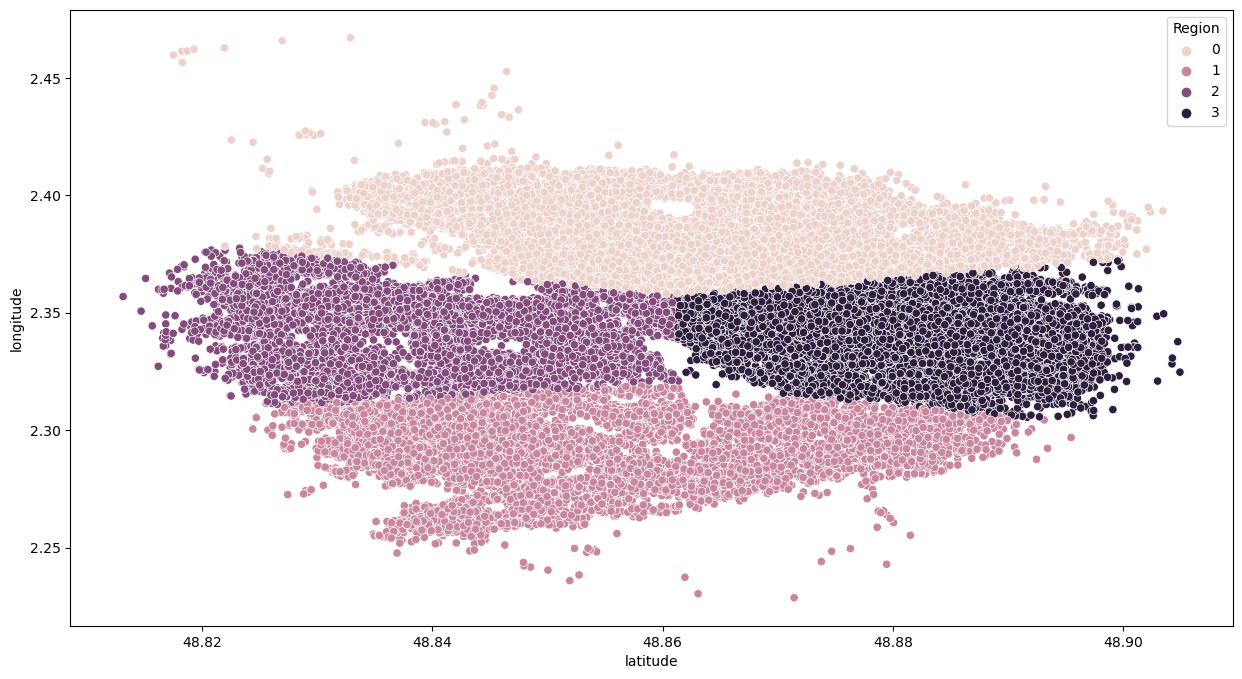

In [301]:
#paris
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_paris[['latitude','longitude']])
lab=kmod.labels_
df_paris['Region']=lab
sns.scatterplot(df_paris['latitude'],df_paris['longitude'],hue=df_paris['Region'])
df_paris['Region']=df_paris['Region'].map({0:'South',1:'East',2:'West',3:'North'})

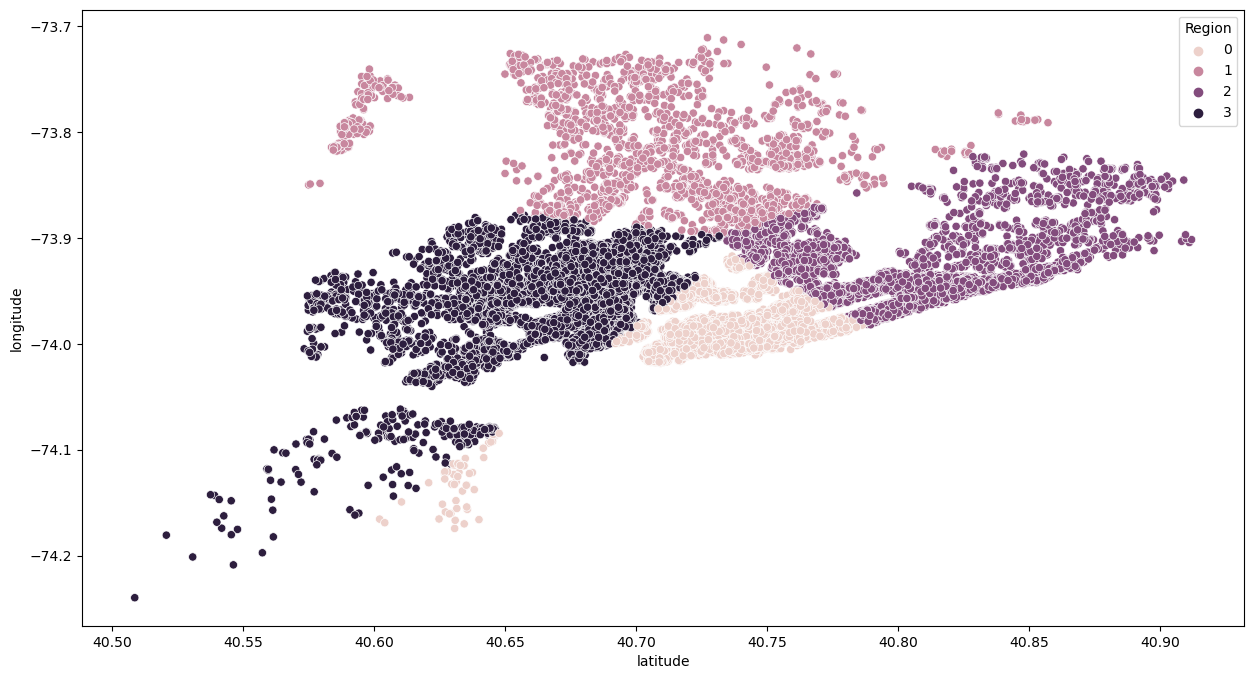

In [302]:
#newyork
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_newyrk[['latitude','longitude']])
lab=kmod.labels_
df_newyrk['Region']=lab
sns.scatterplot(df_newyrk['latitude'],df_newyrk['longitude'],hue=df_newyrk['Region'])
df_newyrk['Region']=df_newyrk['Region'].map({0:'South',1:'North',2:'West',3:'East'})

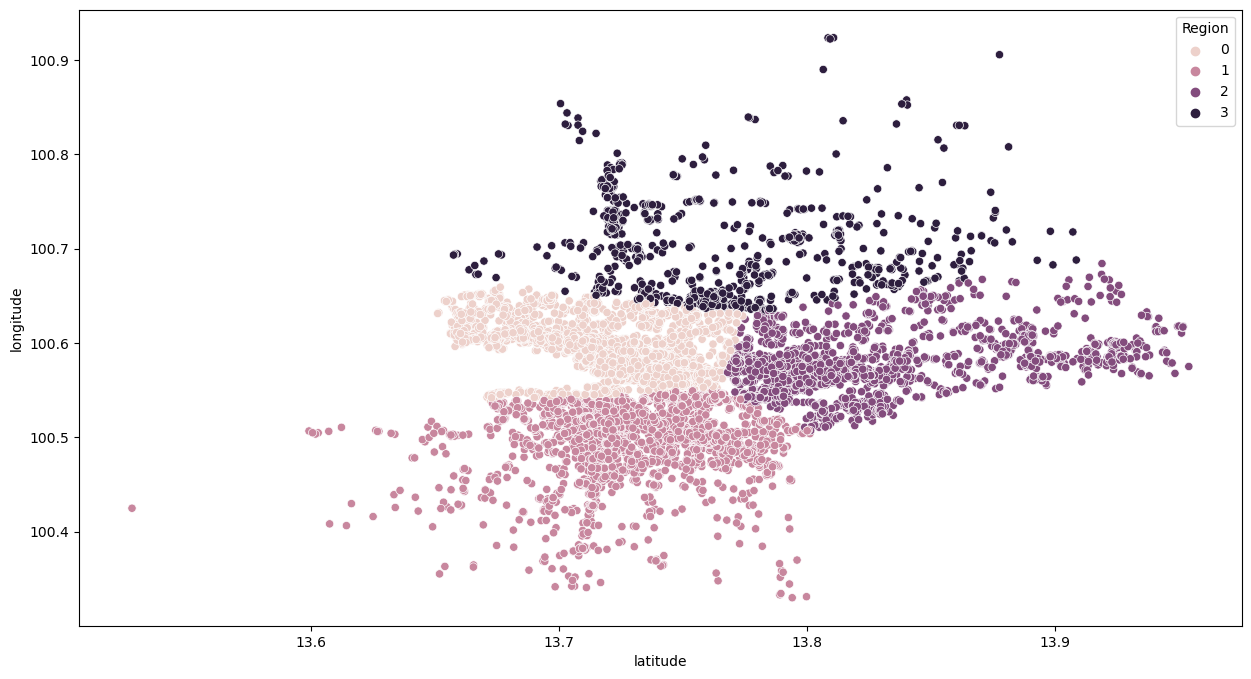

In [303]:
#bangkok
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_bangkok[['latitude','longitude']])
lab=kmod.labels_
df_bangkok['Region']=lab
sns.scatterplot(df_bangkok['latitude'],df_bangkok['longitude'],hue=df_bangkok['Region'])
df_bangkok['Region']=df_bangkok['Region'].map({0:'North',1:'South',2:'West',3:'East'})

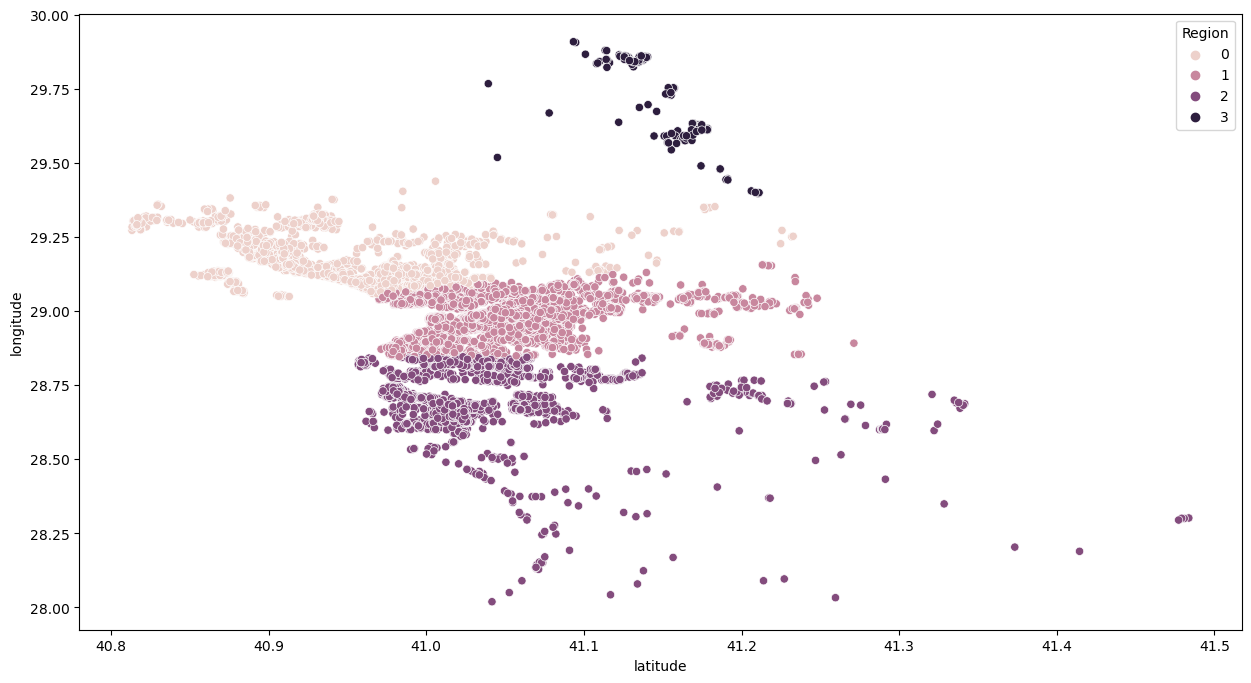

In [304]:
# istanbul
km=KMeans(n_clusters=4, init='k-means++')
kmod=km.fit(df_istanbul[['latitude','longitude']])
lab=kmod.labels_
df_istanbul['Region']=lab
sns.scatterplot(df_istanbul['latitude'],df_istanbul['longitude'],hue=df_istanbul['Region'])
df_istanbul['Region']=df_istanbul['Region'].map({0:'North',1:'West',2:'East',3:'South'})

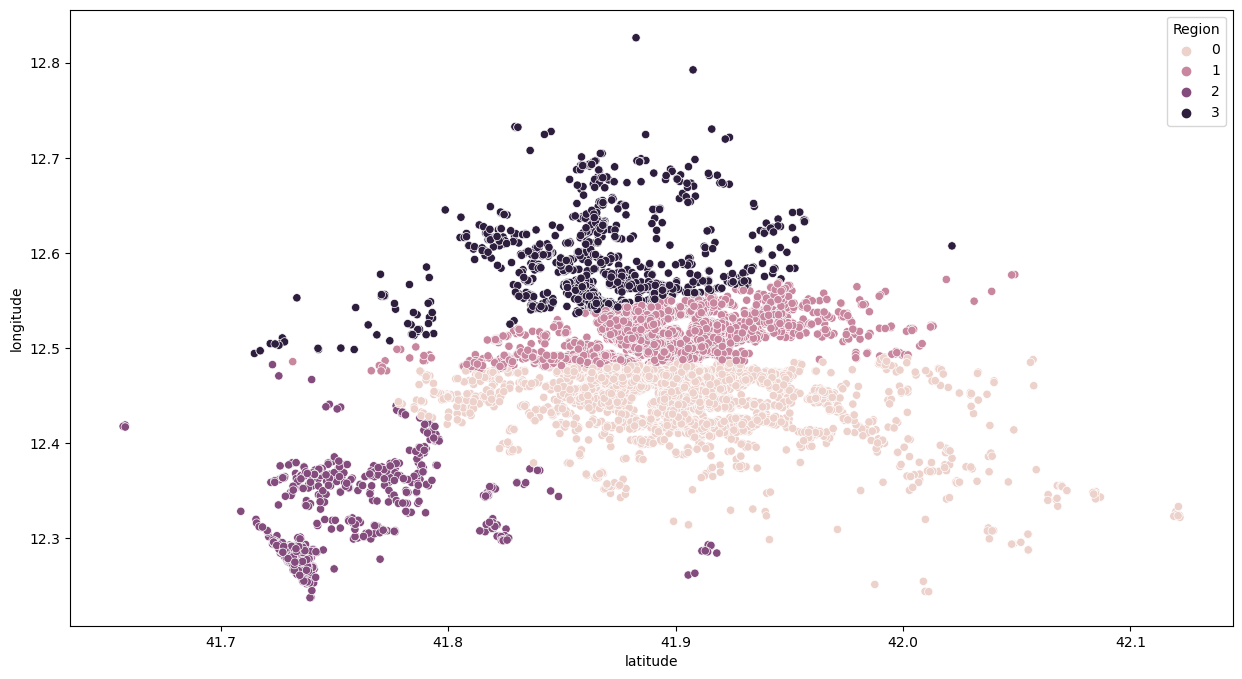

In [305]:
#rome
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_rome[['latitude','longitude']])
lab=kmod.labels_
df_rome['Region']=lab
sns.scatterplot(df_rome['latitude'],df_rome['longitude'],hue=df_rome['Region'])
df_rome['Region']=df_rome['Region'].map({0:'West',1:'East',2:'North',3:'South'})

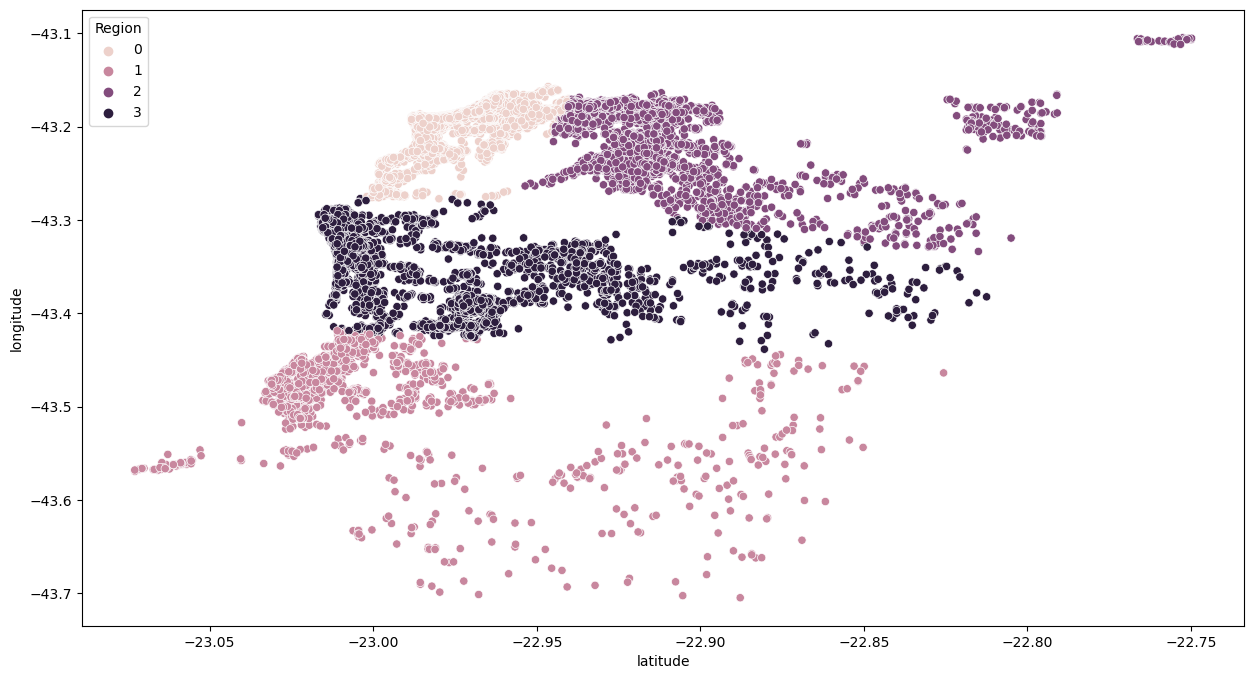

In [306]:
# df_riode
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_riode[['latitude','longitude']])
lab=kmod.labels_
df_riode['Region']=lab
sns.scatterplot(df_riode['latitude'],df_riode['longitude'],hue=df_riode['Region'])
df_riode['Region']=df_riode['Region'].map({0:'East',1:'South',2:'West',3:'North'})

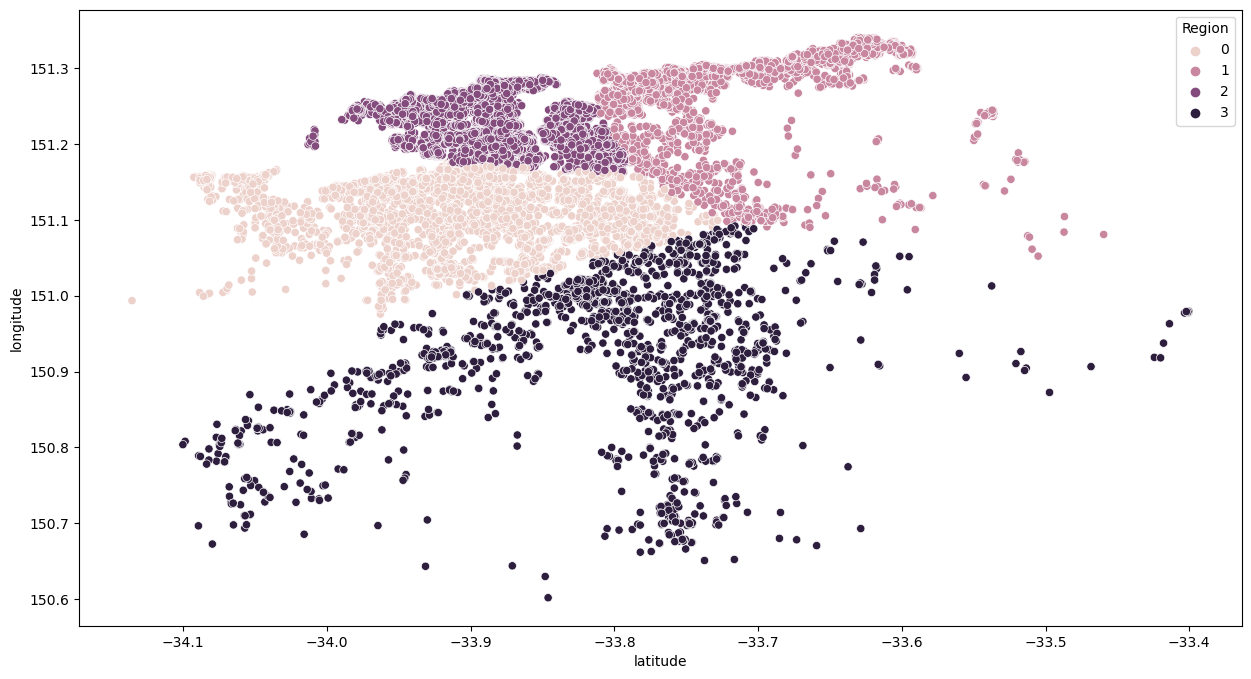

In [307]:
# df_sydney
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_sydney[['latitude','longitude']])
lab=kmod.labels_
df_sydney['Region']=lab
sns.scatterplot(df_sydney['latitude'],df_sydney['longitude'],hue=df_sydney['Region'])
df_sydney['Region']=df_sydney['Region'].map({0:'North',1:'South',2:'West',3:'East'})

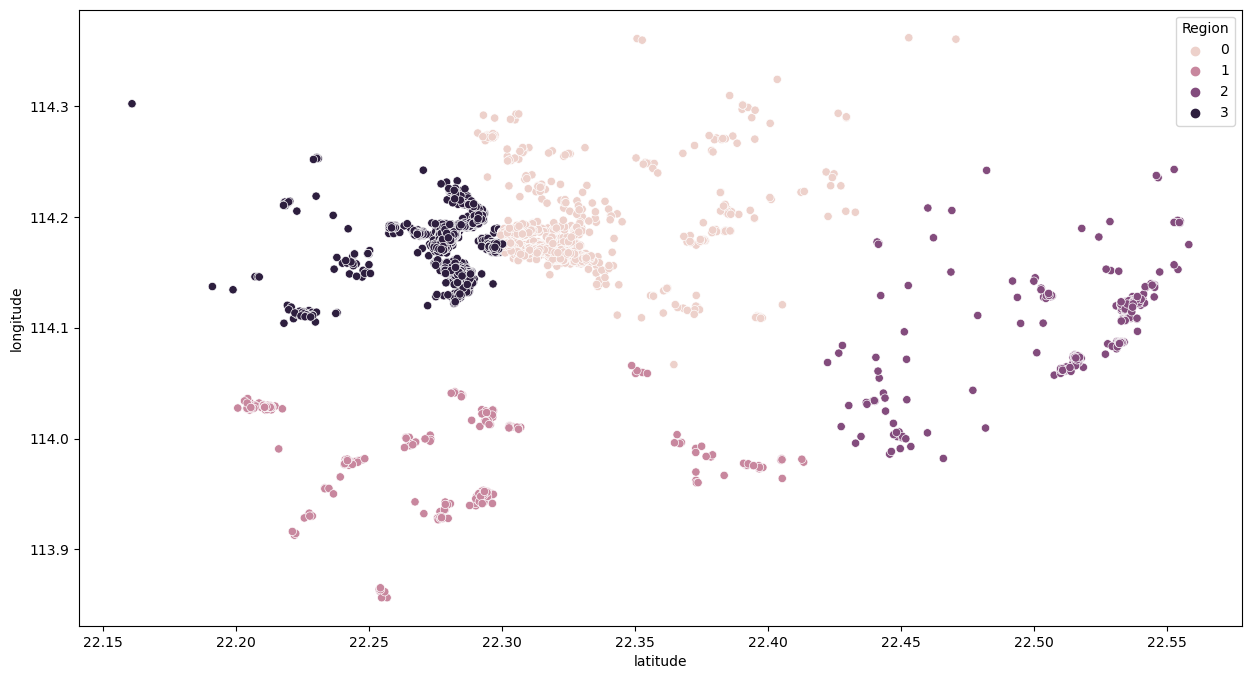

In [308]:
# df_hongkong
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_hongkong[['latitude','longitude']])
lab=kmod.labels_
df_hongkong['Region']=lab
sns.scatterplot(df_hongkong['latitude'],df_hongkong['longitude'],hue=df_hongkong['Region'])
df_hongkong['Region']=df_hongkong['Region'].map({0:'East',1:'West',2:'North',3:'South'})

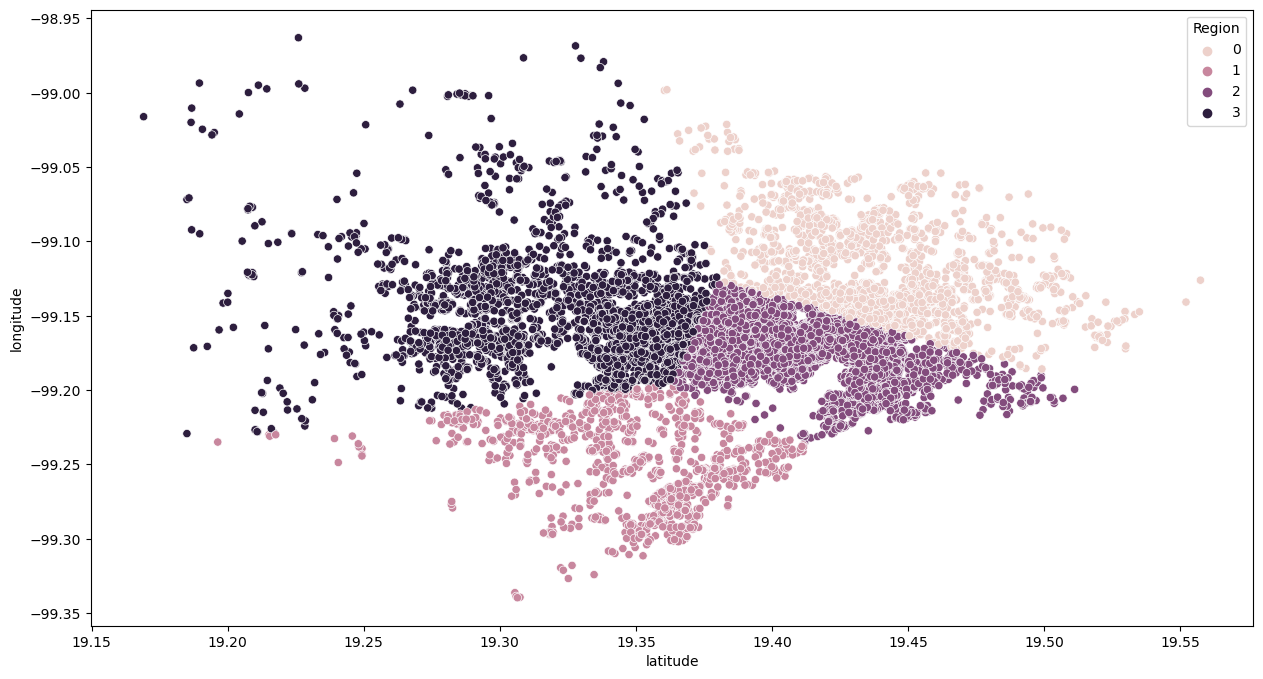

In [309]:
# df_mexico
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_mexico[['latitude','longitude']])
lab=kmod.labels_
df_mexico['Region']=lab
sns.scatterplot(df_mexico['latitude'],df_mexico['longitude'],hue=df_mexico['Region'])
df_mexico['Region']=df_mexico['Region'].map({0:'North',1:'South',2:'East',3:'West'})

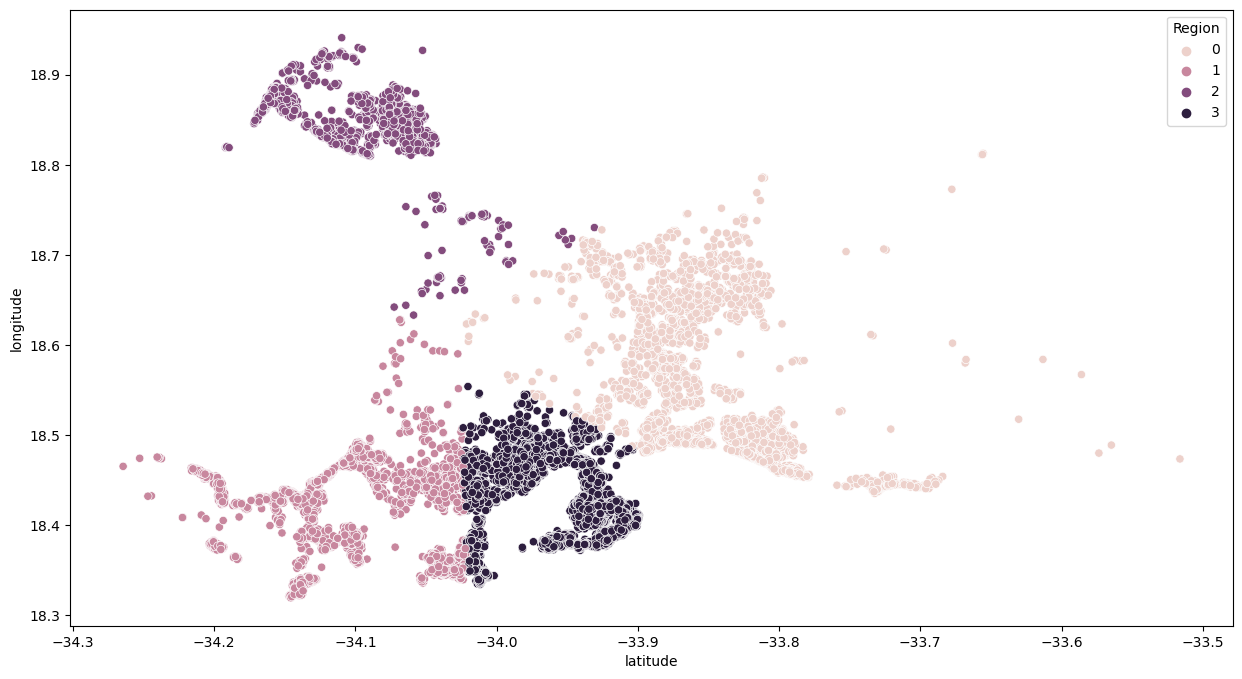

In [310]:
# df_capetown
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_capetwn[['latitude','longitude']])
lab=kmod.labels_
df_capetwn['Region']=lab
sns.scatterplot(df_capetwn['latitude'],df_capetwn['longitude'],hue=df_capetwn['Region'])
df_capetwn['Region']=df_capetwn['Region'].map({0:'West',1:'East',2:'North',3:'South'})

In [311]:
df_airbnb=pd.concat([df_paris,df_newyrk,df_bangkok,df_riode,df_sydney,df_istanbul,df_rome,df_hongkong,df_mexico,df_capetwn])

In [312]:
df_airbnb['Region'].isnull().sum()

0

### Checking for the descriptive statistics of the dataset

In [313]:
df_airbnb.describe(include = 'object').T

count  unique                          top    freq
host_response_time      279473       5                      unknown  128593
host_is_superhost       279473       2                            f  229222
host_has_profile_pic    279473       2                            t  278394
host_identity_verified  279473       2                            t  201043
neighbourhood           279473     660             I Centro Storico   14868
city                    279473      10                        Paris   64623
property_type           279473     143             Entire apartment  138861
room_type               279473       4                 Entire place  181853
amenities               279473  244843  ["Long term stays allowed"]    1384
instant_bookable        279473       2                            f  163924
Region                  279473       4                         West   91536

From above statistics we get to know :

1) There are total 279351 rows and 10 unique classes in city. In that majority class with a count of 64594 is Paris.

2) Variable neighbourhood is having 660 unique values. Out of 660 unqiue districts majority of the property is located in I Centro Storico and their count is 14868

3) Property of room_type Entire place is highest among the other 3 room_type classes with a count of 181751

4) In the target variable we can see it is a binary class and there is no class imbalance. Majority of the property has instant bookability as false with a count of 163844

5) In property_type there are 142 unique classes in that maximum count is for entire apartment of count 138786

6) For majority of the hosts there identity has been verified and they have profile picture.

### Checking for the summary statistics of the dataset

In [314]:
df_airbnb.describe().T

count          mean           std       min  \
host_response_rate           279473.0      0.467532  4.793144e-01   0.00000   
host_acceptance_rate         279473.0      0.493103  4.632361e-01   0.00000   
host_total_listings_count    279473.0     11.573240  4.666310e+01   1.00000   
latitude                     279473.0     18.759348  3.255973e+01 -34.26440   
longitude                    279473.0     12.593154  7.307681e+01 -99.33963   
accommodates                 279473.0      3.289080  2.133675e+00   0.00000   
bedrooms                     279473.0      1.464617  1.103801e+00   1.00000   
price                        279473.0    609.004498  3.443148e+03   0.00000   
minimum_nights               279473.0      8.048445  3.152451e+01   1.00000   
maximum_nights               279473.0  27581.580693  7.285989e+06   1.00000   
review_scores_rating         279473.0     63.733561  4.335140e+01   0.00000   
review_scores_accuracy       279473.0      7.404756  4.076545e+00   0.00000   
review_scores_cleanliness    279473.0      7.218803  4.009373e+00   0.00000   
review_scores_checkin        279473.0      7.523238  4.114920e+00   0.00000   
review_scores_communication  279473.0      7.514853  4.115360e+00   0.00000   
review_scores_location       279473.0      7.474897  4.082281e+00   0.00000   
review_scores_value          279473.0      7.224424  3.991712e+00   0.00000   

                                  25%         50%         75%           max  
host_response_rate            0.00000     0.14000     1.00000  1.000000e+00  
host_acceptance_rate          0.00000     0.59000     1.00000  1.000000e+00  
host_total_listings_count     1.00000     1.00000     4.00000  6.270000e+02  
latitude                    -22.96439    40.71073    41.90860  4.890491e+01  
longitude                   -43.19803     2.38278    28.98673  1.513398e+02  
accommodates                  2.00000     2.00000     4.00000  1.600000e+01  
bedrooms                      1.00000     1.00000     2.00000  5.000000e+01  
price                        75.00000   150.00000   475.00000  6.252160e+05  
minimum_nights                1.00000     2.00000     5.00000  9.999000e+03  
maximum_nights               45.00000  1125.00000  1125.00000  2.147484e+09  
review_scores_rating          9.00000    91.00000    98.00000  1.000000e+02  
review_scores_accuracy        7.50000    10.00000    10.00000  1.000000e+01  
review_scores_cleanliness     6.00000     9.00000    10.00000  1.000000e+01  
review_scores_checkin         8.00000    10.00000    10.00000  1.000000e+01  
review_scores_communication   8.00000    10.00000    10.00000  1.000000e+01  
review_scores_location        8.00000    10.00000    10.00000  1.000000e+01  
review_scores_value           7.00000     9.00000    10.00000  1.000000e+01

From above statistics we get to know :
    
1) Average of price of properties listed is $6.08

2) Minimum nights allowed to stay is one night

3) Maximum people allowed to stay is 16 members

4) Size of bedrooms range from room type, minimum rooms available is 1 and maximum is 50

### Univariate Analysis

#### City

In Airbnb, the city column is a categorical variable that identifies the city where a particular listing is located.

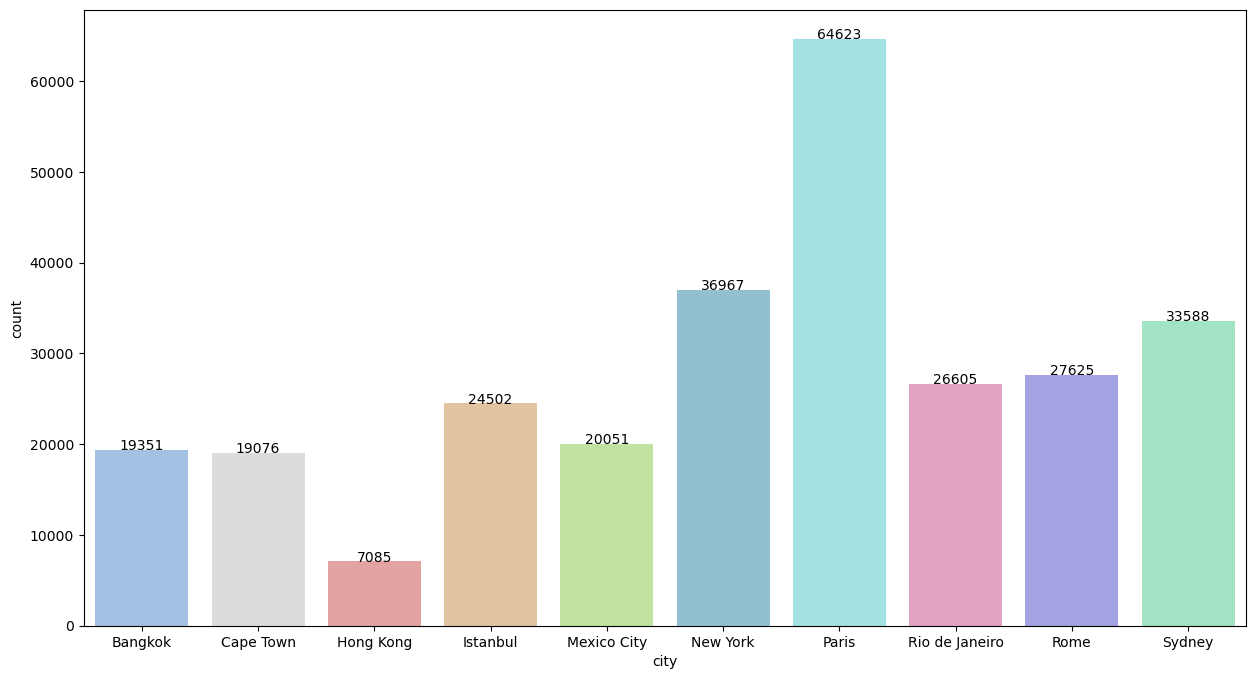

In [315]:
sns.countplot(df_airbnb['city'].sort_values(),palette = colors)

for i,v in enumerate(df_airbnb['city'].value_counts().sort_index()):
    plt.text(x = i , y = v + 5 , s = v, ha = 'center')

From above countplot it is clearly evident that more properties are available in Paris of count 54657 followed by NewYork 36994 and Sydney 33596. Least property is in HongKong city with total properties of 7083. Also we can see that Bangkok and Cape Town almost has same number of properties available

#### Room Type

Room_type describes the type of room or space that is being offered for rent. The room_type variable can be used as a feature in data analysis or modeling to predict the likelihood of a booking, and to identify the factors that are most predictive of a guest's preference for a particular room type.

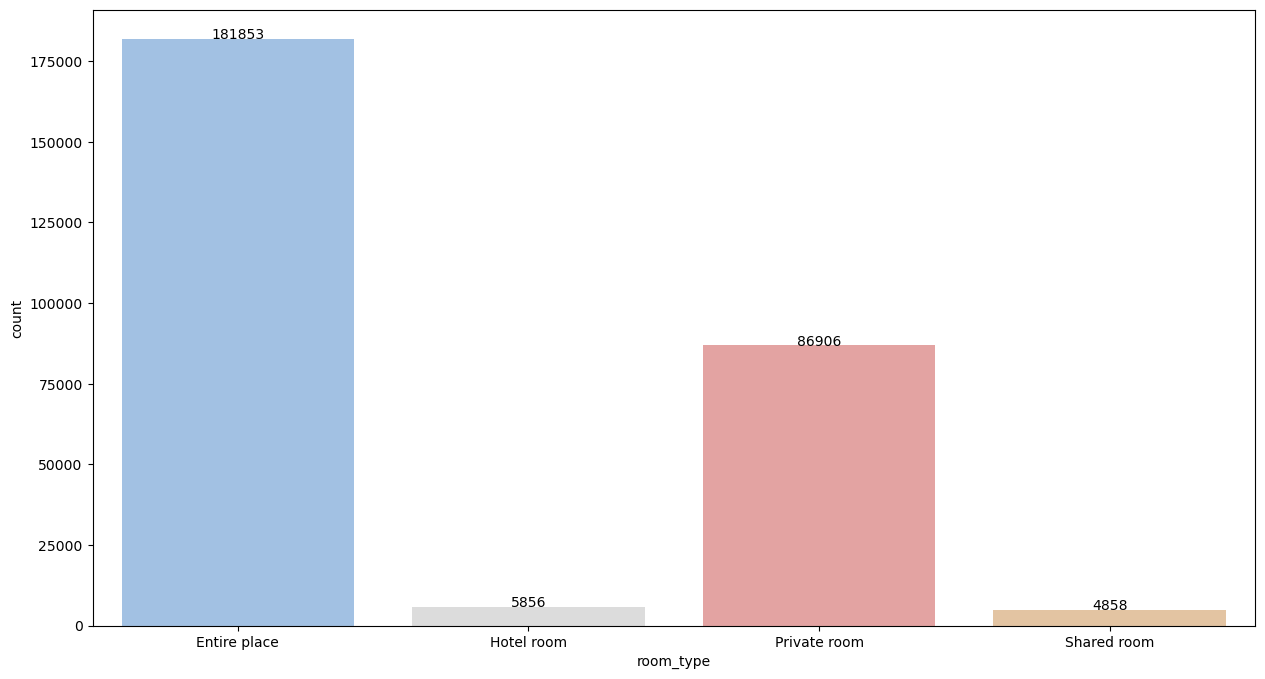

In [316]:
sns.countplot(df_airbnb['room_type'].sort_values(),palette = colors)

for i,v in enumerate(df_airbnb['room_type'].value_counts().sort_index()):
    plt.text(x = i , y = v + 5 , s = v, ha = 'center')

From above countplot we can infer that most of the properties available are Entire place with a count of 181886. Next to Entire place is Private room having 86945 properties. Comparatvely Shared room and Hotel room share the same number of properties 

#### Instant_bookable

This variable can help hosts to optimize their listings for instant bookings, and to improve their overall booking rates and occupancy rates.

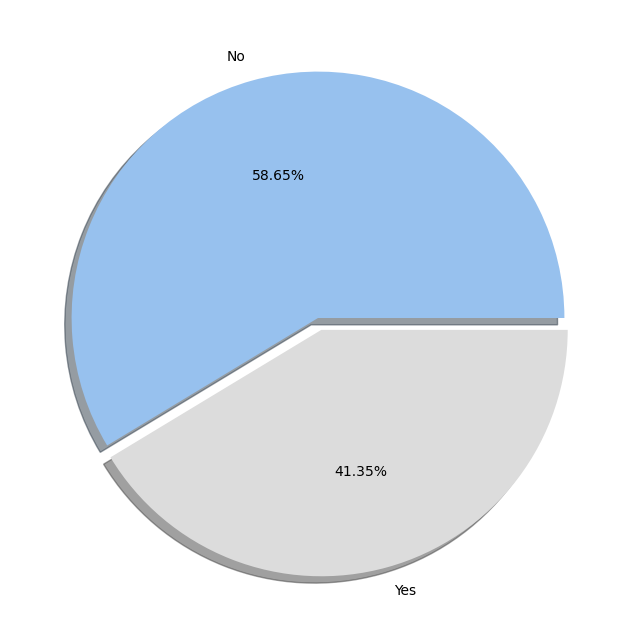

In [317]:
s = df_airbnb['instant_bookable'].value_counts()

plt.pie(s, labels = ['No','Yes'], autopct = '%.2f%%', shadow = True, explode = [0,0.05],colors = colors)
plt.show()

From above countplot and value_counts we can see that binary class is not in equal proportions but still it is not class imbalanced since the percentage of minority class is nearly 40%. Creating synthetic data using smote technique will not required

#### Host_identity_verified

This variable shows whether the host's identity has been verified by Airbnb or not. This variable can be useful for guests to assess the trustworthiness and safety of a potential host. A host with a verified identity is generally perceived as more trustworthy and reliable, as it suggests that Airbnb has confirmed their identity and has taken steps to ensure that they are who they claim to be.

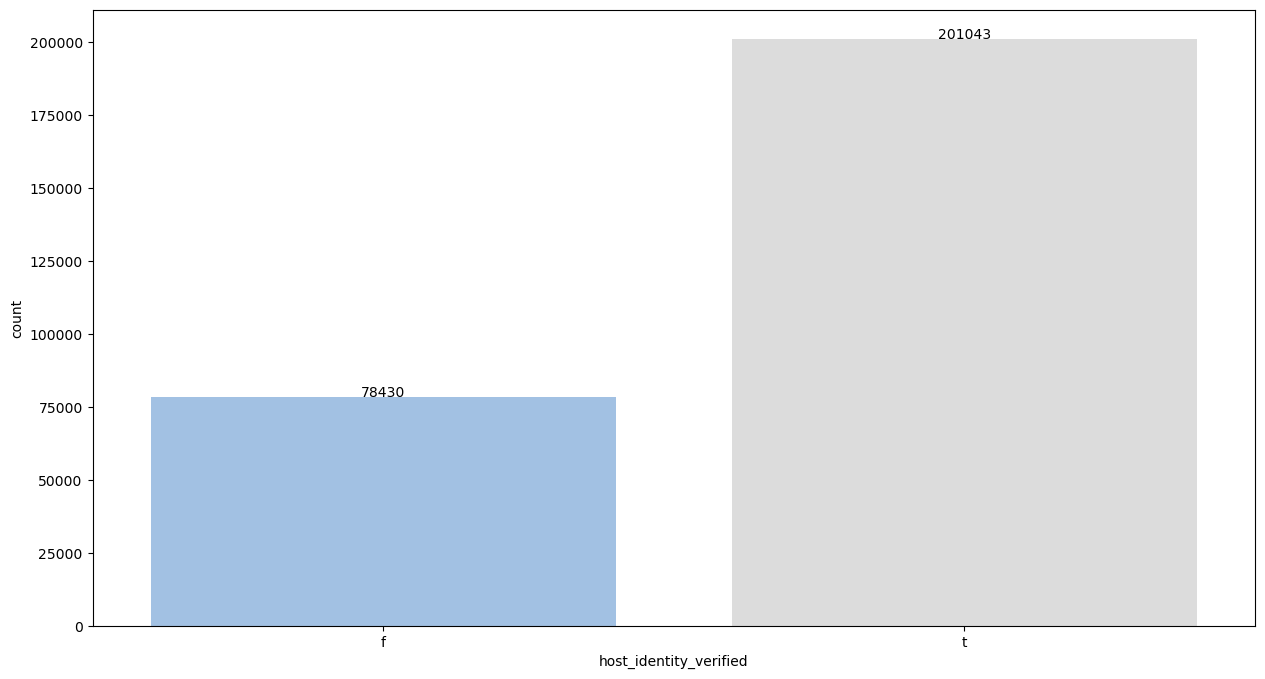

In [318]:
sns.countplot(df_airbnb['host_identity_verified'].sort_values(),palette = colors)

for i,v in enumerate(df_airbnb['host_identity_verified'].value_counts().sort_index()):
    plt.text(x = i , y = v + 5 , s = v, ha = 'center')

Majority of the properties posted we have host verified their idenity by Airbnb 

#### Host_has_profile_pic

This variable shows whether the host has uploaded a profile picture or not. This variable can be useful for guests to assess the trustworthiness and professionalism of a potential host. A host with a profile picture is generally perceived as more trustworthy and reliable, as it suggests that they are invested in their Airbnb hosting and are more likely to be responsive to guests' needs.

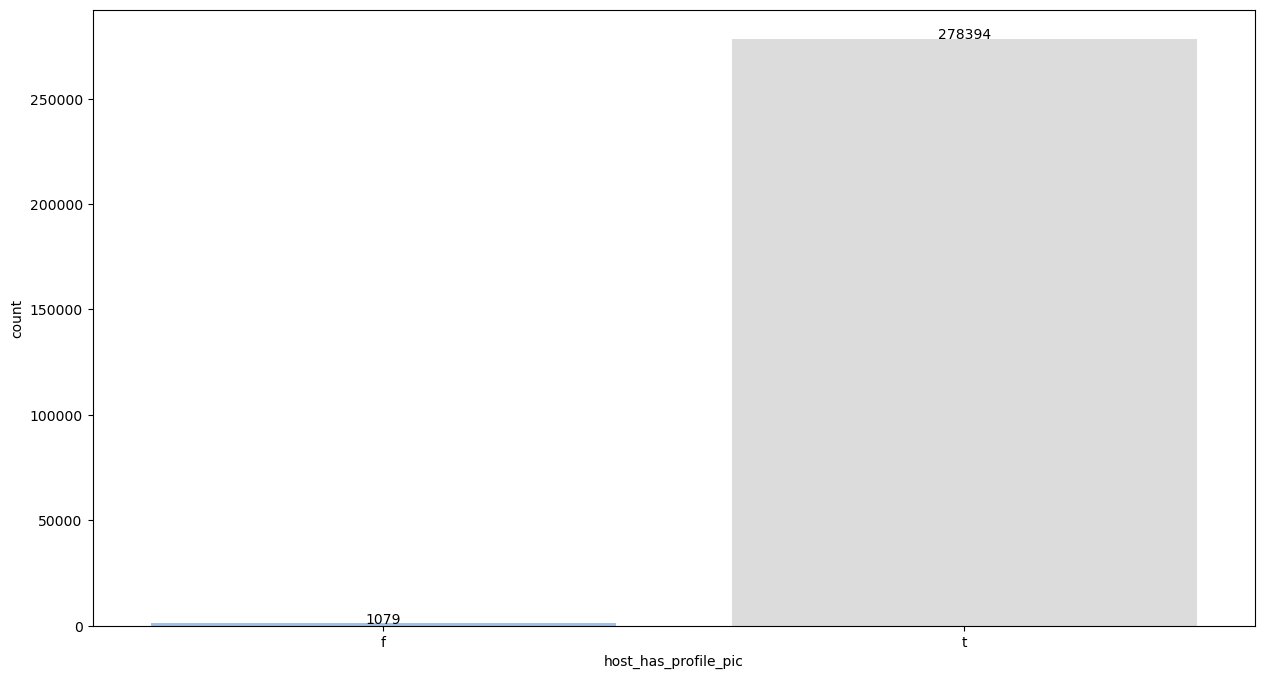

In [319]:
sns.countplot(df_airbnb['host_has_profile_pic'].sort_values(),palette = colors)

for i,v in enumerate(df_airbnb['host_has_profile_pic'].value_counts().sort_index()):
    plt.text(x = i , y = v + 5 , s = v, ha = 'center')

From above countplot we get to know that majority of the host has updated their profile picture

#### Host_is_superhost

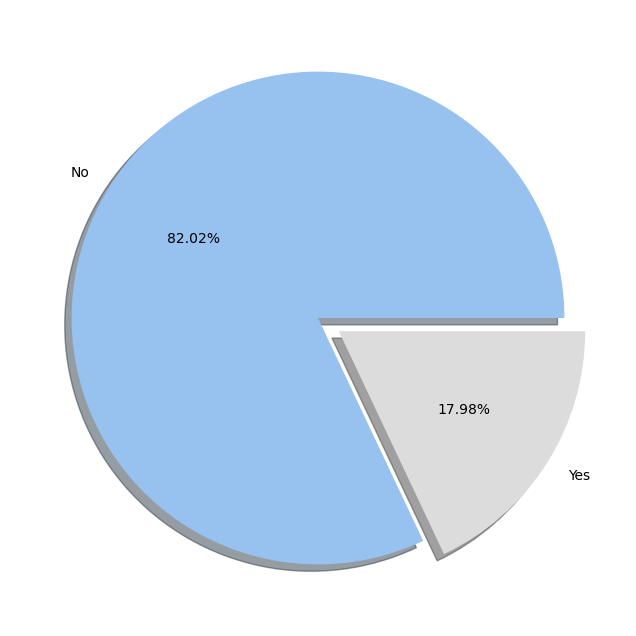

In [320]:
s = df_airbnb['host_is_superhost'].value_counts()

plt.pie(s, labels = ['No','Yes'], autopct = '%.2f%%', shadow = True, explode = [0,0.1],colors = colors)
plt.show()

As we can see from above pie chart most of the host are not a superhost.

#### Host_response_time

This variable indicates how long it takes for a host to respond to a guest's booking inquiry or message. The host_response_time variable can be used as a feature in data analysis or modeling to predict the likelihood of a booking, and to identify the factors that are most predictive of a host's response time.

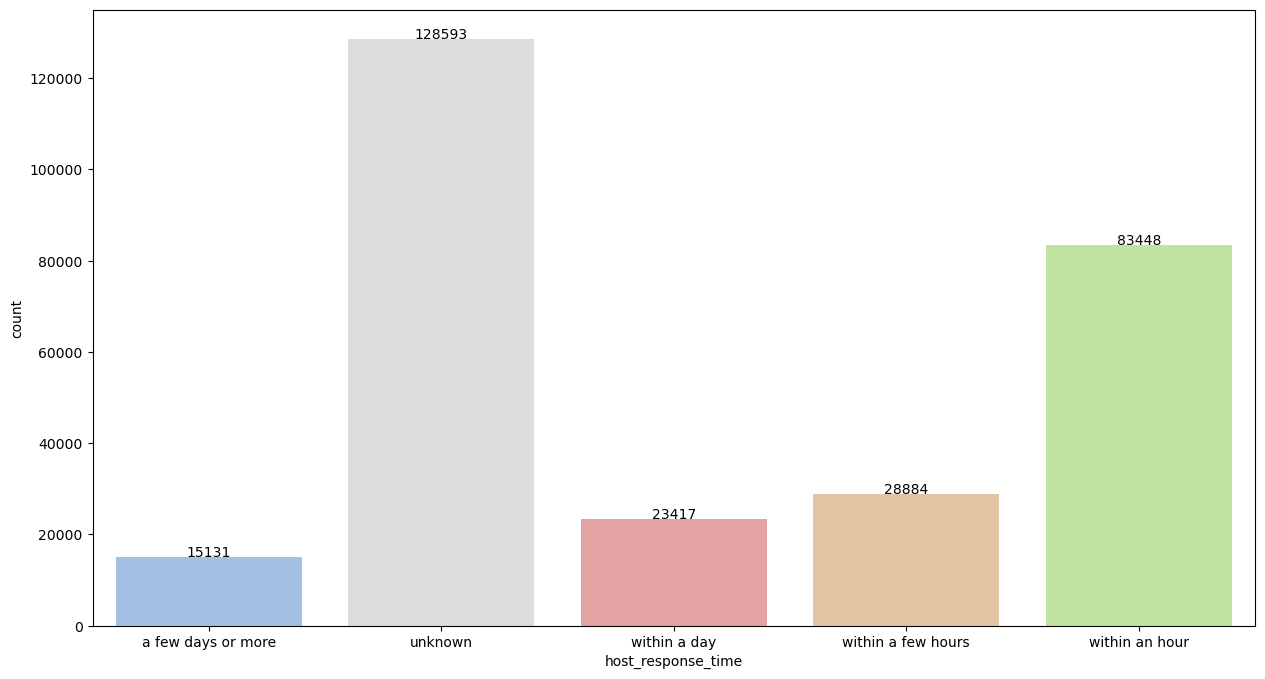

In [321]:
sns.countplot(df_airbnb['host_response_time'].sort_values(),palette = colors)

for i,v in enumerate(df_airbnb['host_response_time'].value_counts().sort_index()):
    plt.text(x = i , y = v + 5 , s = v, ha = 'center')

From above countplot it is clearly evident that the response rate of many hosts are unknown. But apart from unknown majority of the hosts respond within an hour or to the max they respond within a day. Only few host take a few days to respond

#### Host_response_rate

This variable indicates the percentage of enquiries or messages that a host responds to within a certain timeframe. And it is expressed in percentage, ranging from 0 to 100.

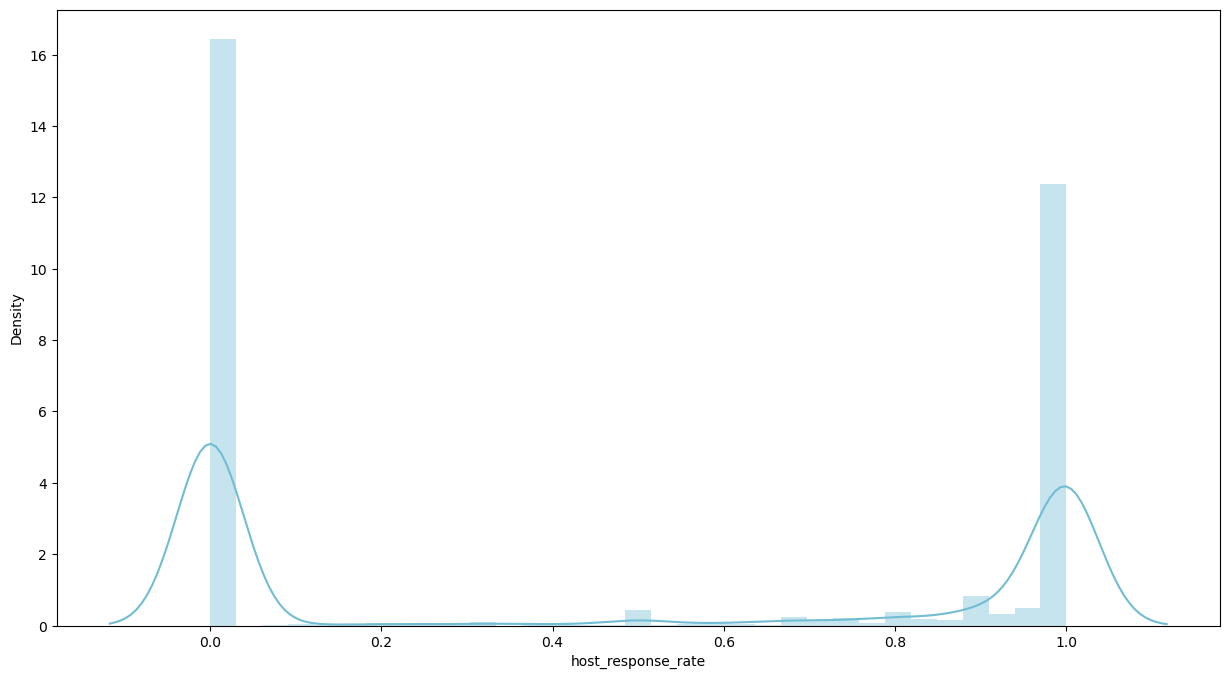

In [322]:
sns.distplot(df_airbnb['host_response_rate'],color = '#72bcd4')
plt.show()

#### Host_acceptance_rate

This variable indicates the percentage of booking requests that a host accepts. And it is expressed in percentage, ranging from 0 to 100.

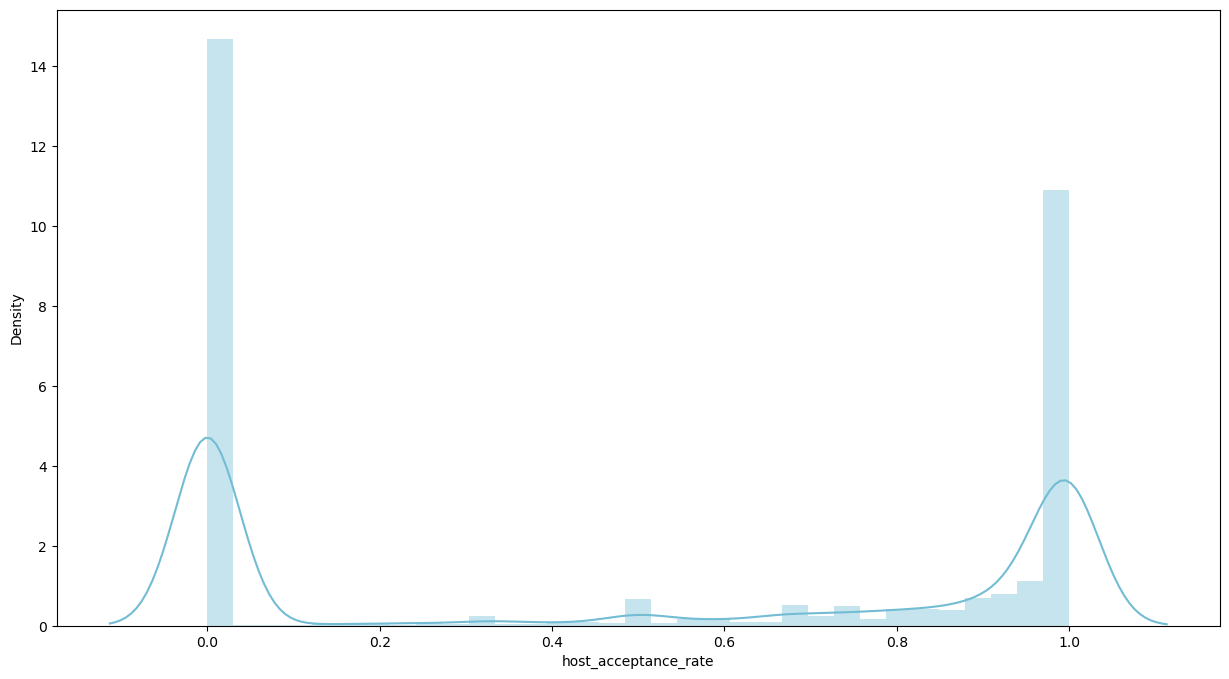

In [323]:
sns.distplot(df_airbnb['host_acceptance_rate'],color = '#72bcd4')
plt.show()

#### Accommodates

It indicates the maximum number of guests that a particular listing can accommodate.

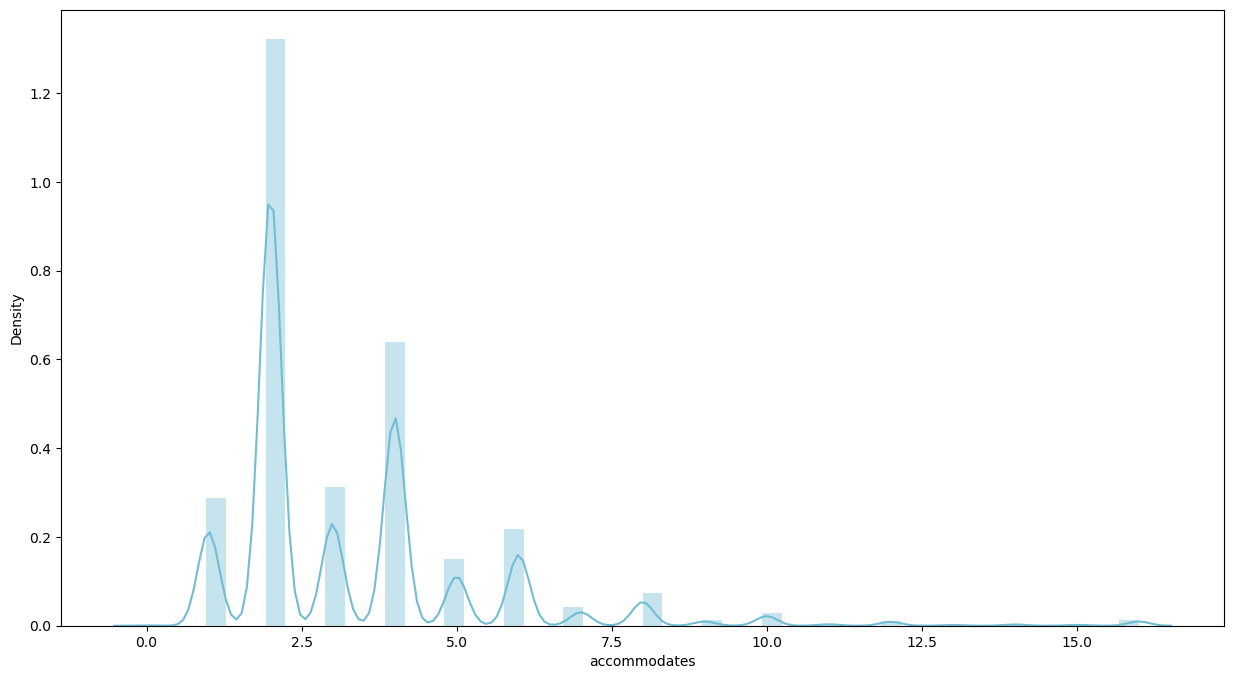

In [324]:
sns.distplot(df_airbnb['accommodates'],color = '#72bcd4')
plt.show()

#### Bedrooms

This variable indicates the number of bedrooms available in a particular listing. 

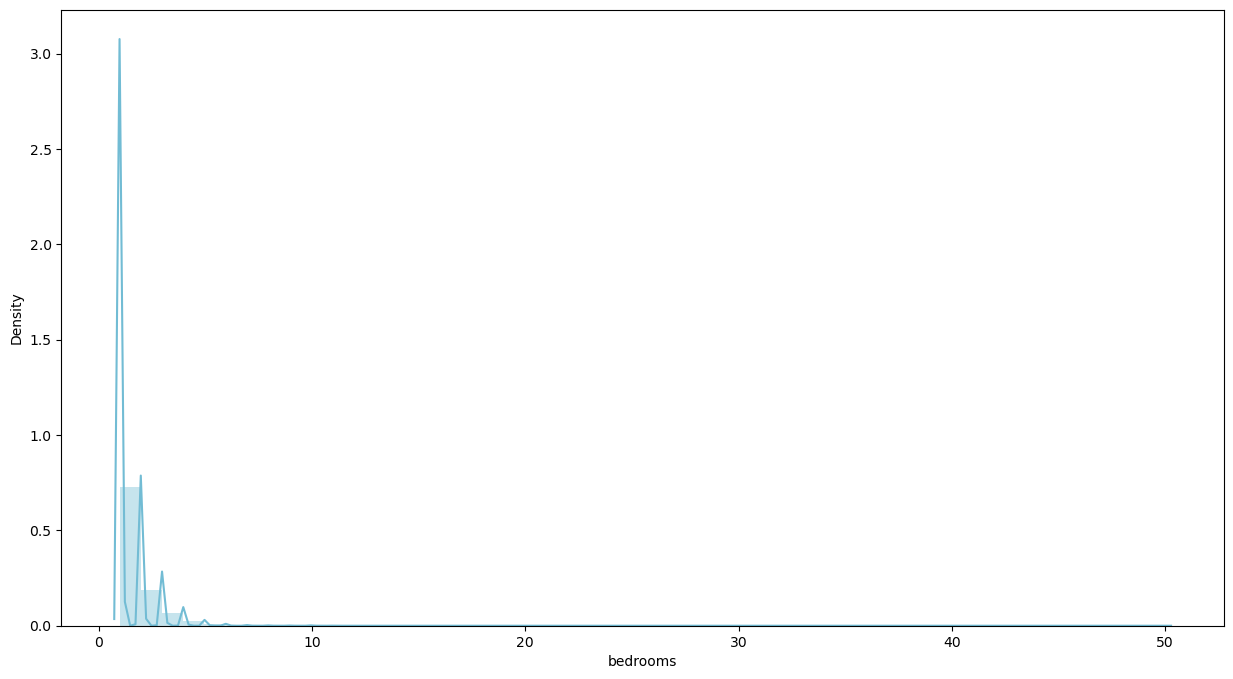

In [325]:
sns.distplot(df_airbnb['bedrooms'],color = '#72bcd4')
plt.show()

#### Price

It indicates the nightly price of a particular listing and it is often one of the primary factors that guests consider when choosing a listing to book.

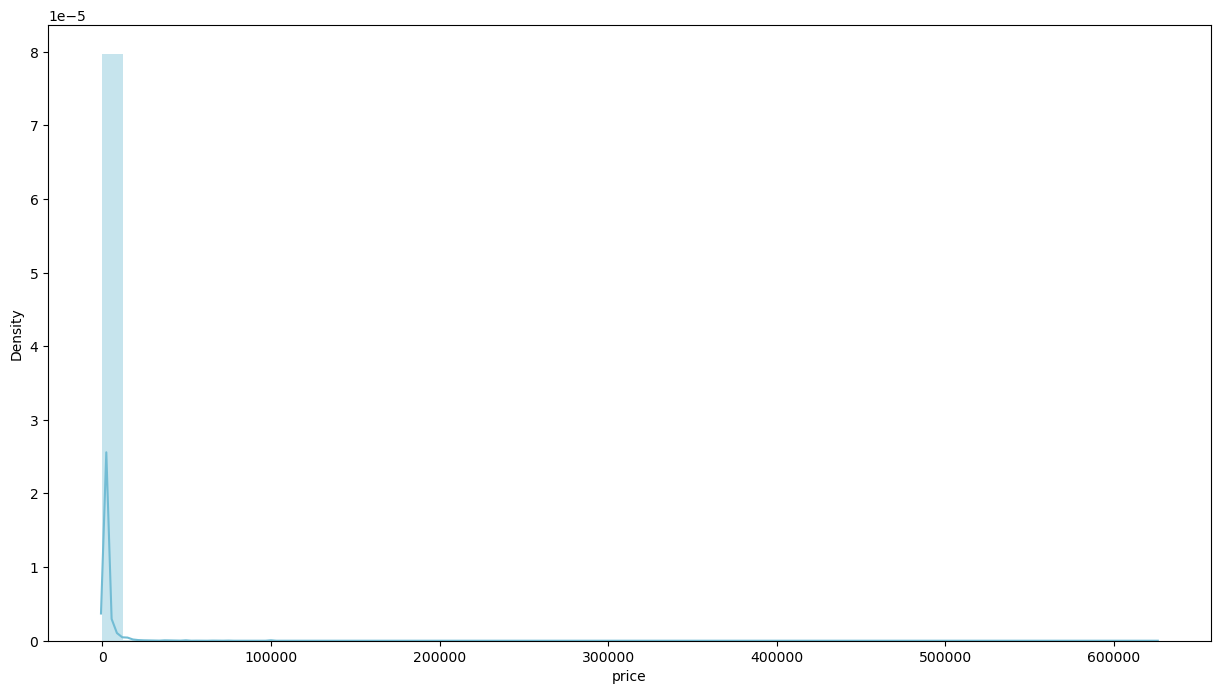

In [326]:
sns.distplot(df_airbnb['price'],color = '#72bcd4')
plt.show()

#### Review_scores_rating

This variable indicates the overall satisfaction rating of guests who have stayed at a particular listing and it provides insight into the quality of the listing and the experiences of previous guests.

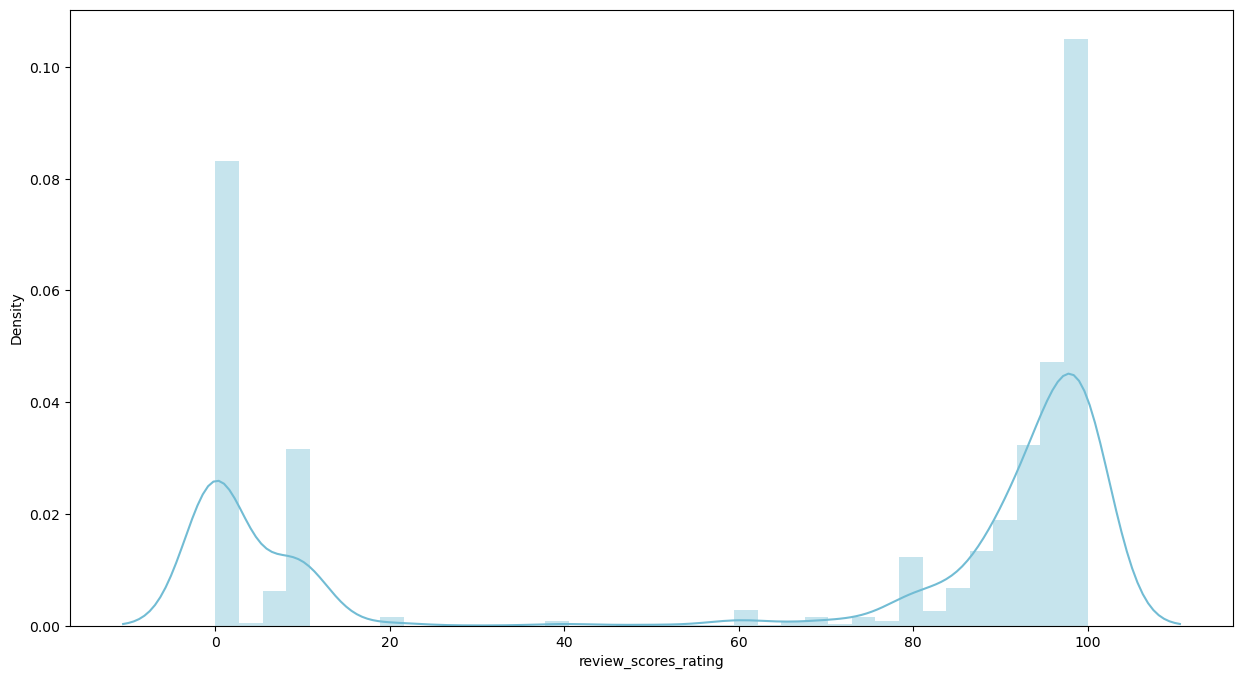

In [327]:
sns.distplot(df_airbnb['review_scores_rating'],color = '#72bcd4')
plt.show()

#### Regions

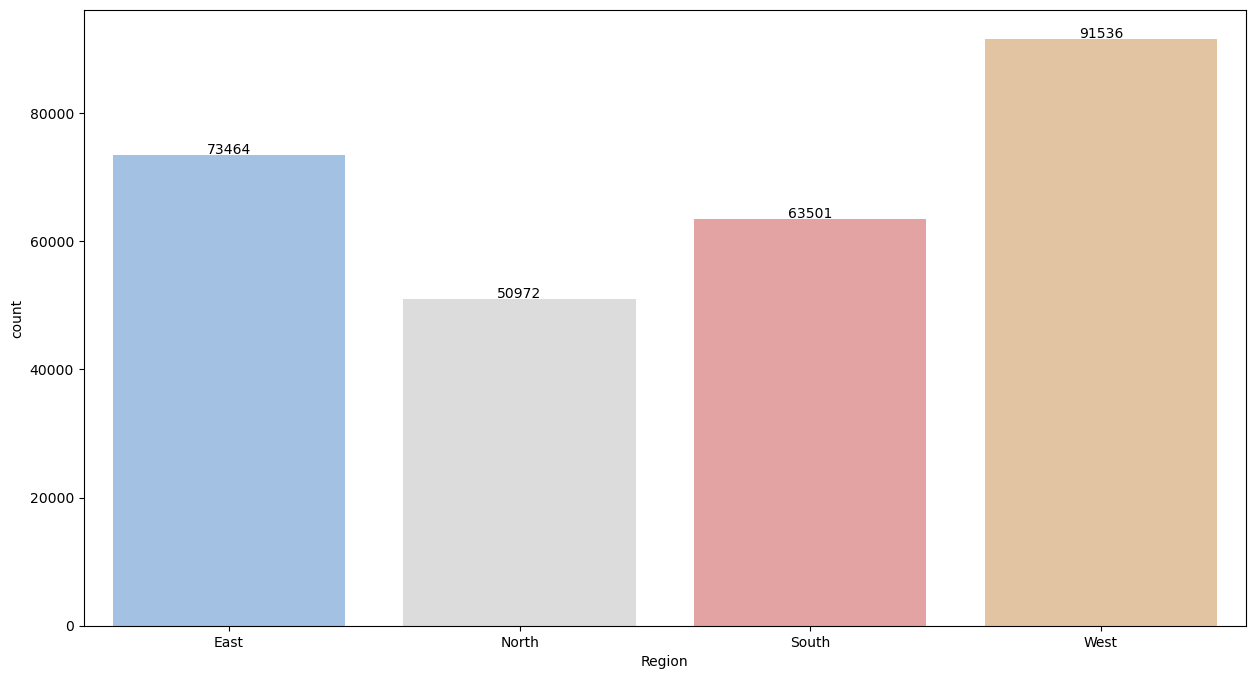

In [328]:
sns.countplot(df_airbnb['Region'].sort_values() , palette = colors)

for i,v in enumerate(df_airbnb['Region'].value_counts().sort_index()):
    plt.text(x = i , y = v + 200 , s = v , ha = 'center')

### Bivariate Analysis

#### City vs Price

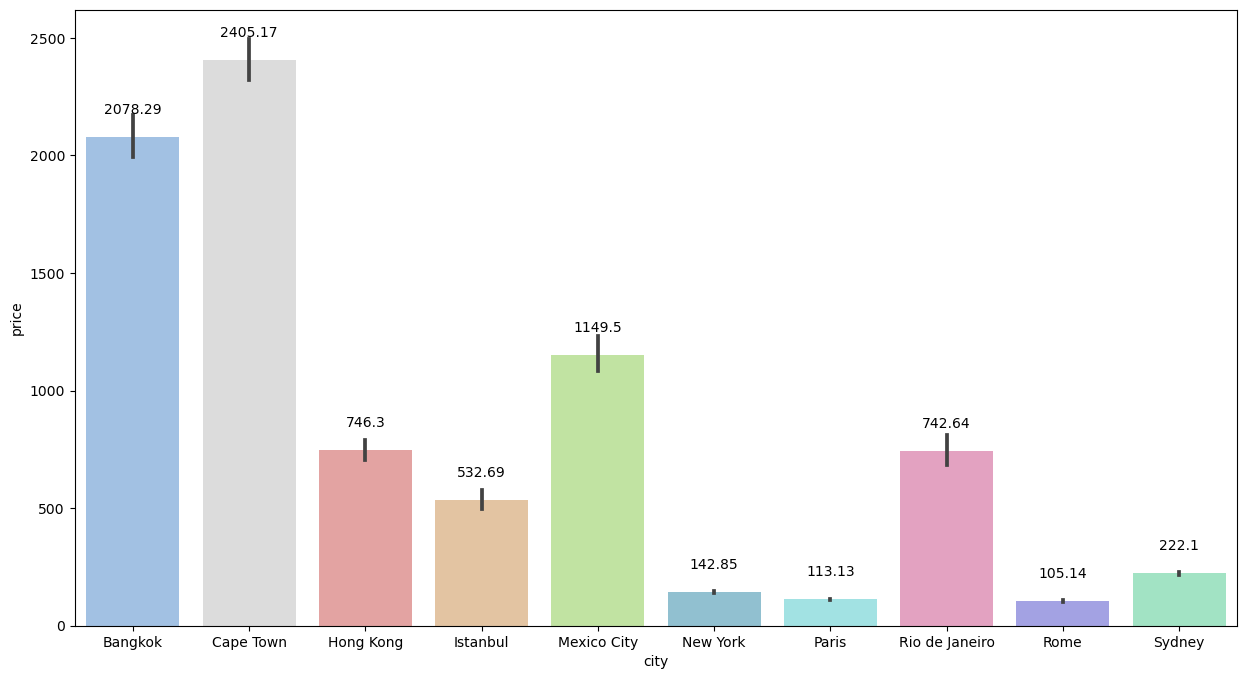

In [329]:
sns.barplot(x = df_airbnb['city'].sort_values(), y = df_airbnb['price'],palette = colors)

for i,v in enumerate(df_airbnb.groupby('city')['price'].mean()):
    plt.text(x = i , y = v + 100, s = round(v,2) , ha = 'center')

From the plot we can infer that Highest price is in Cape Town of 2405 per night followed by Bankgkok 2078 per night. Average price is in Mexico of 1149 and least price is in the cities of NewYork, Paris and Rome 

#### Host_identity_verified vs Price

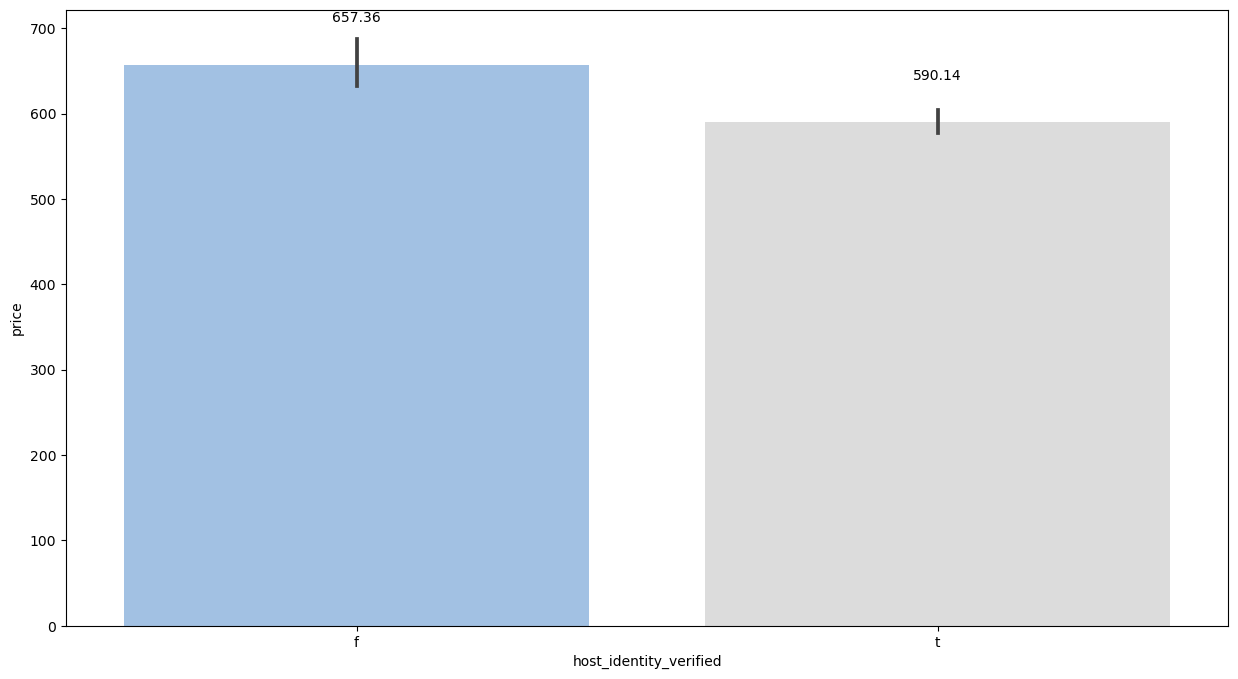

In [330]:
sns.barplot(x = df_airbnb['host_identity_verified'], y = df_airbnb['price'],palette = colors)

for i,v in enumerate(df_airbnb.groupby('host_identity_verified')['price'].mean()):
    plt.text(x = i , y = v + 50, s = round(v,2) , ha = 'center')

From above plot it is clearly evident that there is no much significal difference in price between having verified status or not. Price is almost same for both classes

#### Room_type vs Price

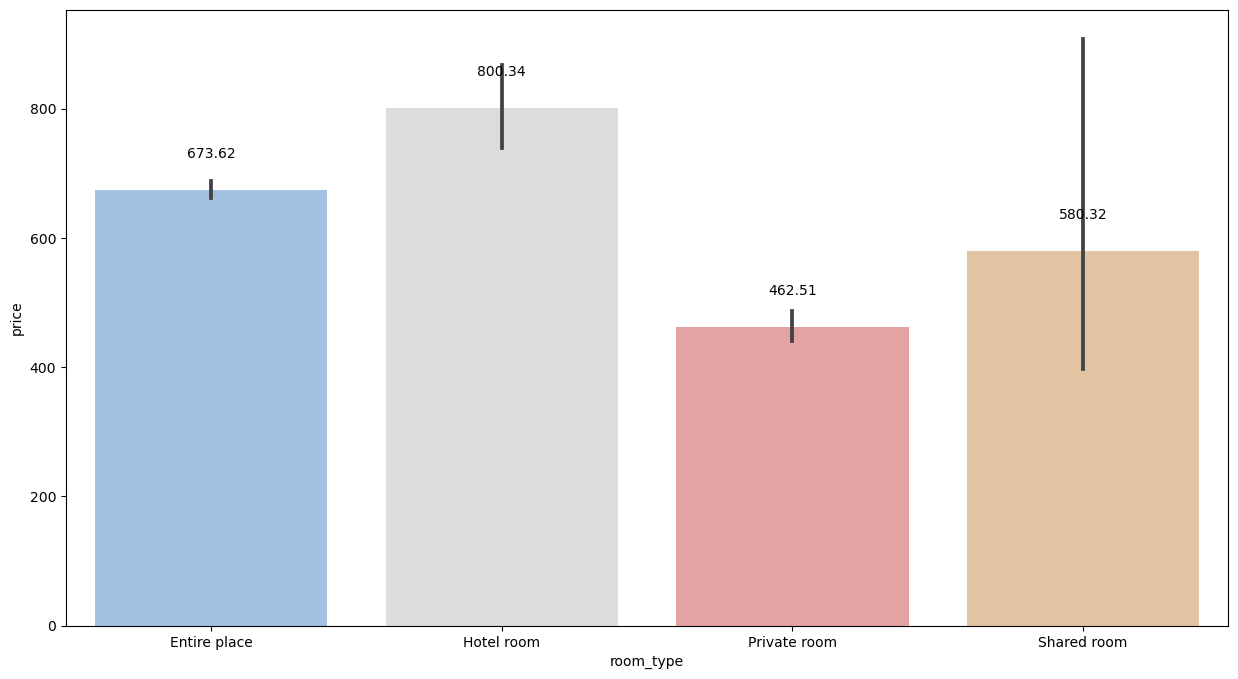

In [331]:
sns.barplot(x = df_airbnb['room_type'].sort_values(), y = df_airbnb['price'],palette = colors)

for i,v in enumerate(df_airbnb.groupby('room_type')['price'].mean()):
    plt.text(x = i , y = v + 50, s = round(v,2) , ha = 'center')

From above barplot we can see that price for Hotel room and Entire place is expensive compared to Private room and Shared room. The price of former is 800 & 673 and the latter is 462 & 580

#### Instant bookable vs Review score rating

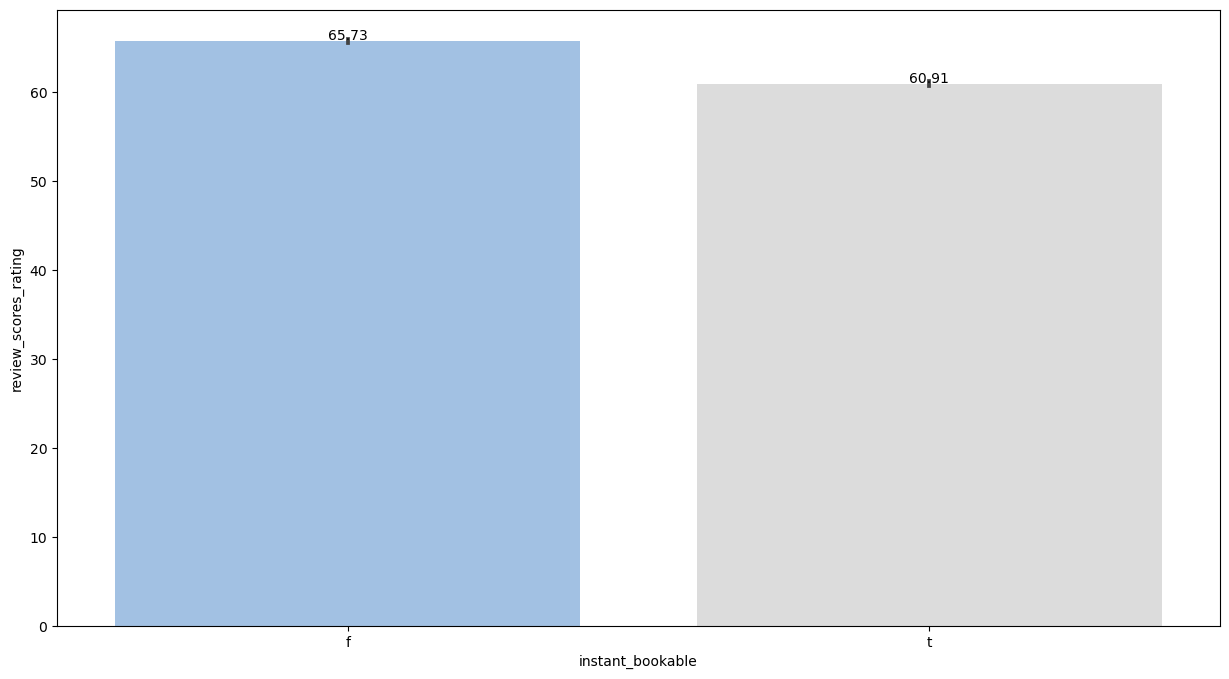

In [332]:
sns.barplot(x = df_airbnb['instant_bookable'].sort_values(), y = df_airbnb['review_scores_rating'],palette = colors)

for i,v in enumerate(df_airbnb.groupby('instant_bookable')['review_scores_rating'].mean()):
    plt.text(x = i , y = v + 0.1, s = round(v,2) , ha = 'center')

From above plot we get to know that there is not much significance difference in rating's irrespective of the instant bookable

#### City vs Review score rating

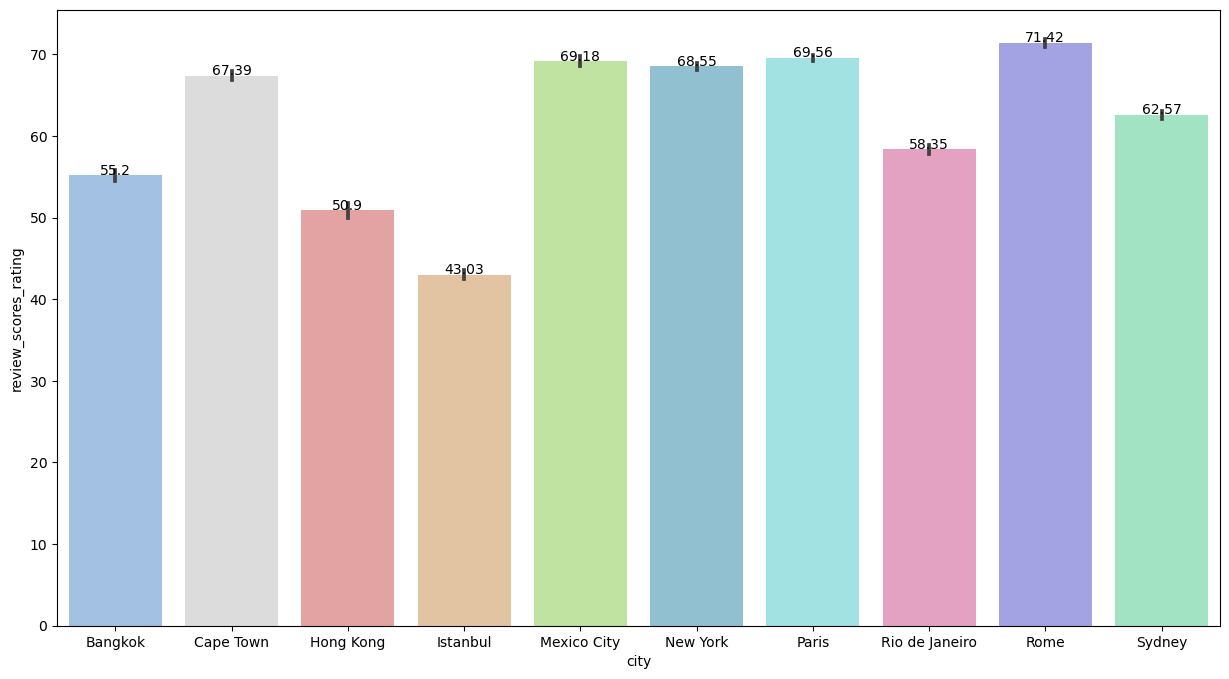

In [333]:
sns.barplot(x = df_airbnb['city'].sort_values(), y = df_airbnb['review_scores_rating'],palette = colors)

for i,v in enumerate(df_airbnb.groupby('city')['review_scores_rating'].mean()):
    plt.text(x = i , y = v + 0.1, s = round(v,2) , ha = 'center')

The above plot shows the distribution of rating's across different cities. We can see that there is no much diiference in the rating score among the cities

#### Accomodates vs price

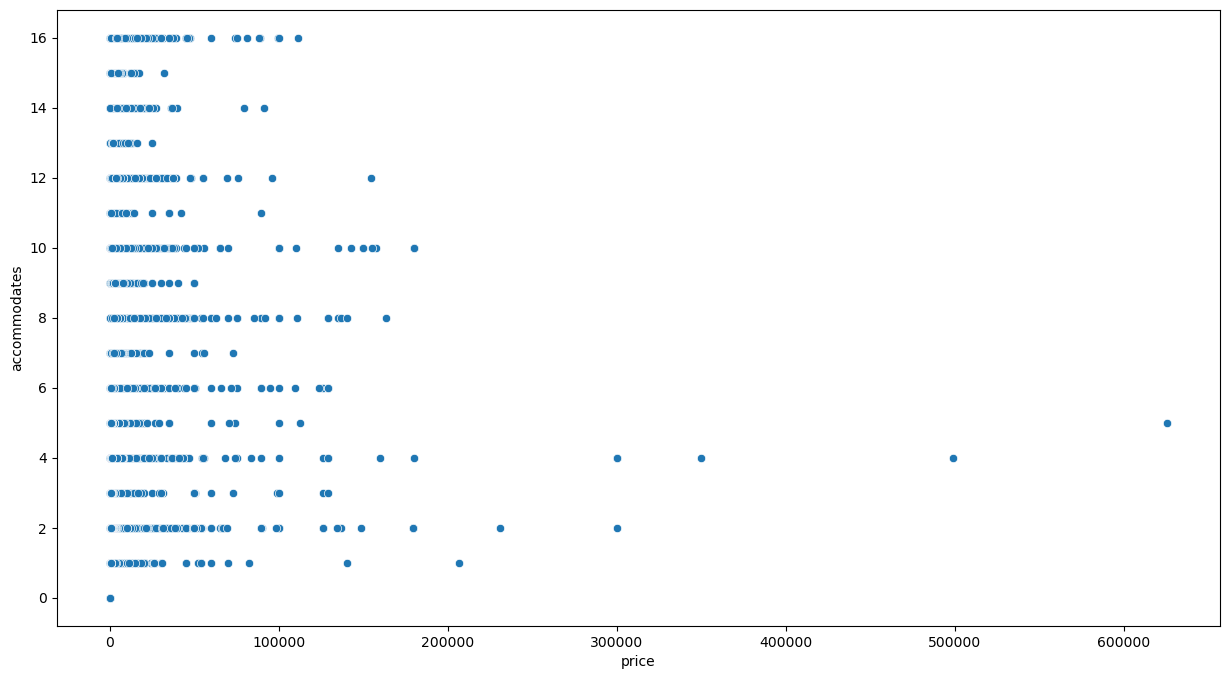

In [334]:
sns.scatterplot(x = df_airbnb['price'], y = df_airbnb['accommodates'],palette = colors)
plt.show()

#### Accomodates vs Bedrooms

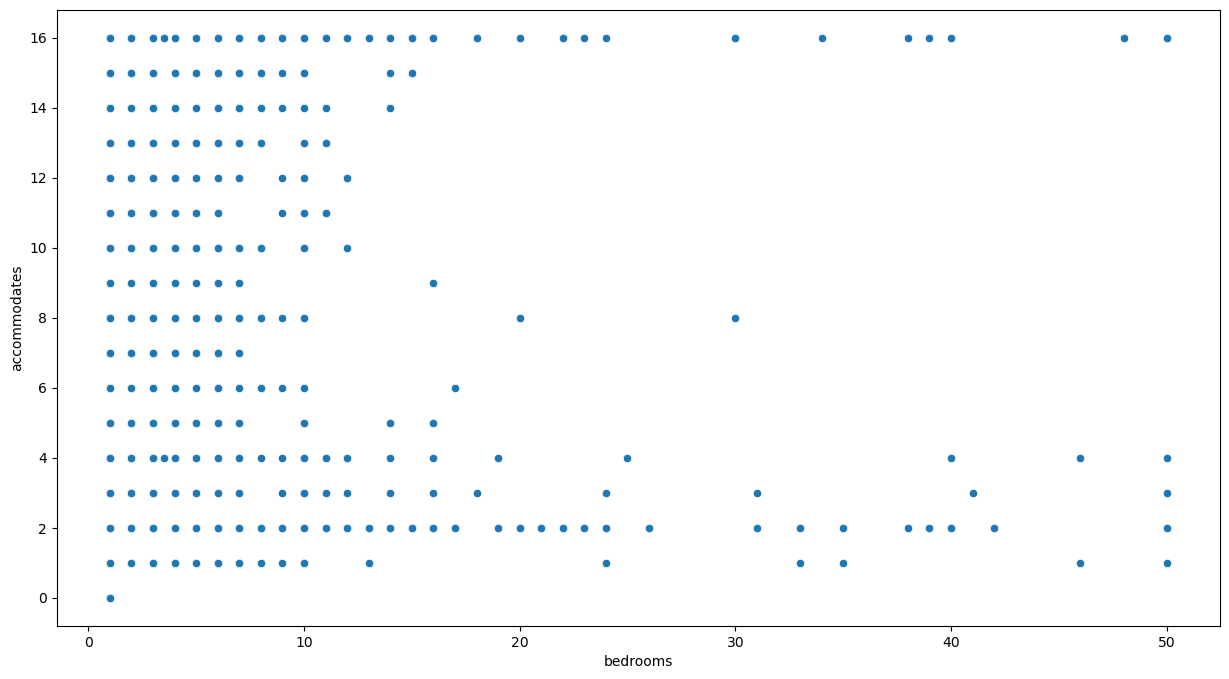

In [335]:
sns.scatterplot(x = df_airbnb['bedrooms'], y = df_airbnb['accommodates'],palette = colors)
plt.show()

#### Price vs Bedrooms

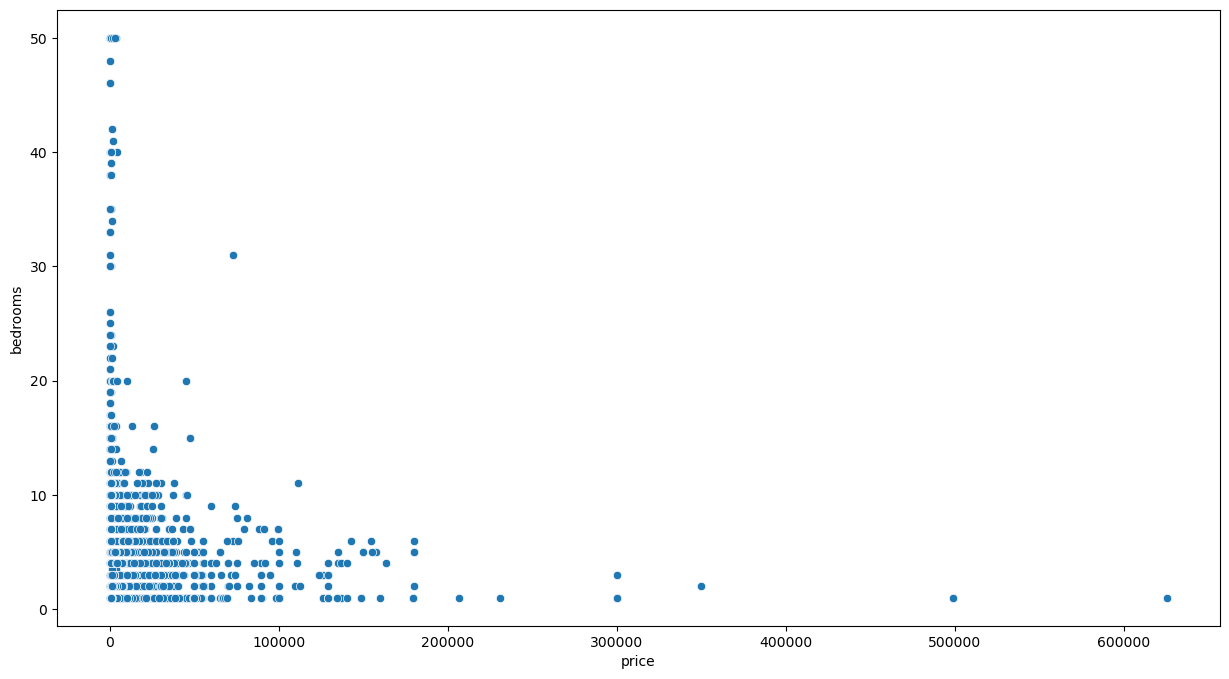

In [336]:
sns.scatterplot(x = df_airbnb['price'], y = df_airbnb['bedrooms'],palette = colors)
plt.show()

#### Price vs Review score rating

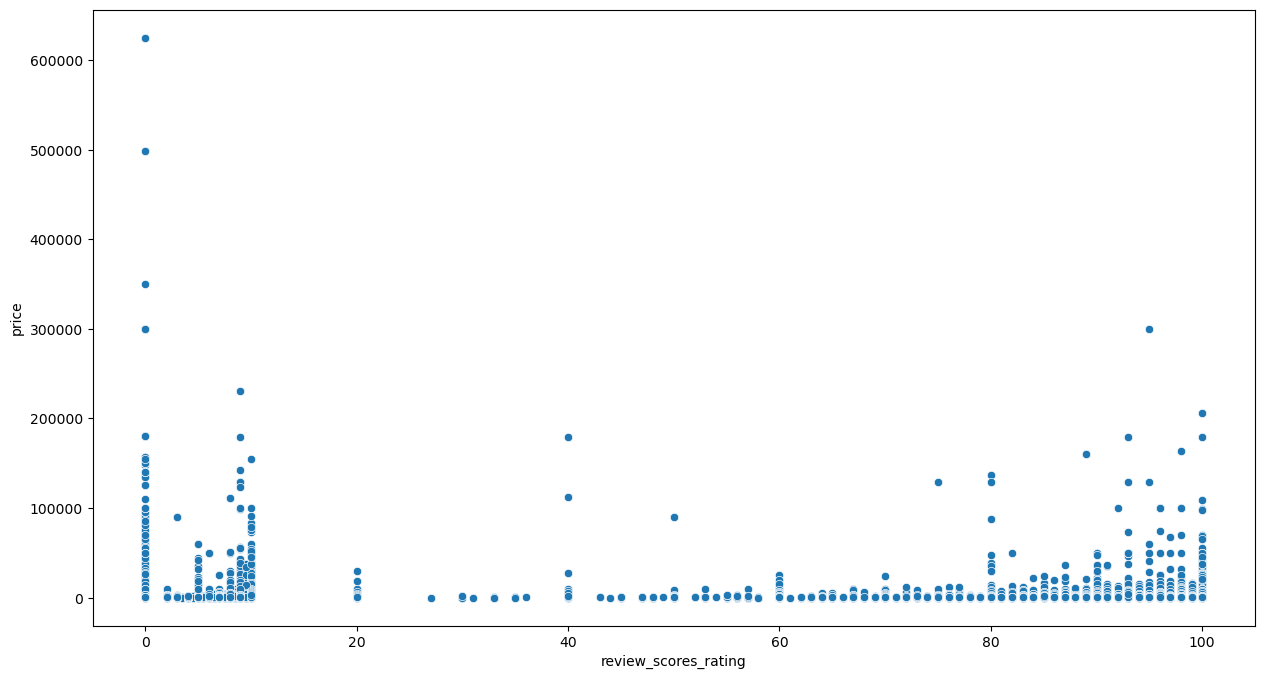

In [337]:
sns.scatterplot(x = df_airbnb['review_scores_rating'], y = df_airbnb['price'],palette = colors)
plt.show()

#### Accommodates vs Review score rating

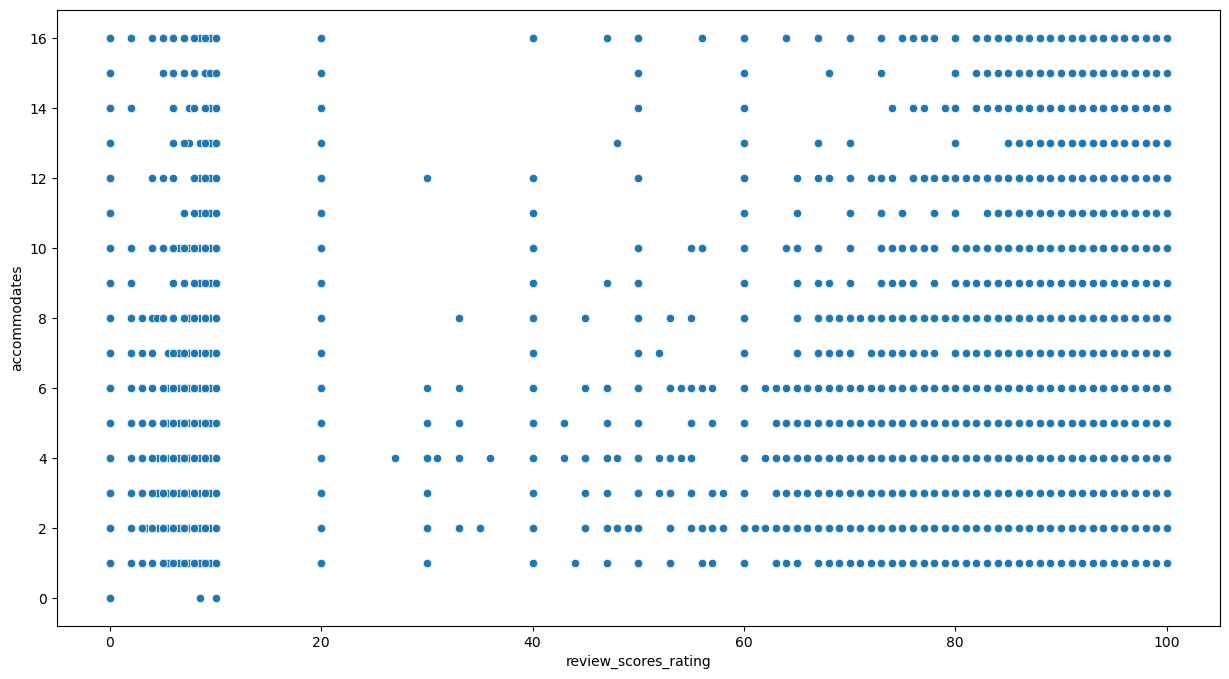

In [338]:
sns.scatterplot(x = df_airbnb['review_scores_rating'], y = df_airbnb['accommodates'],palette = ['#9ae355'])
plt.show()

#### Region vs price

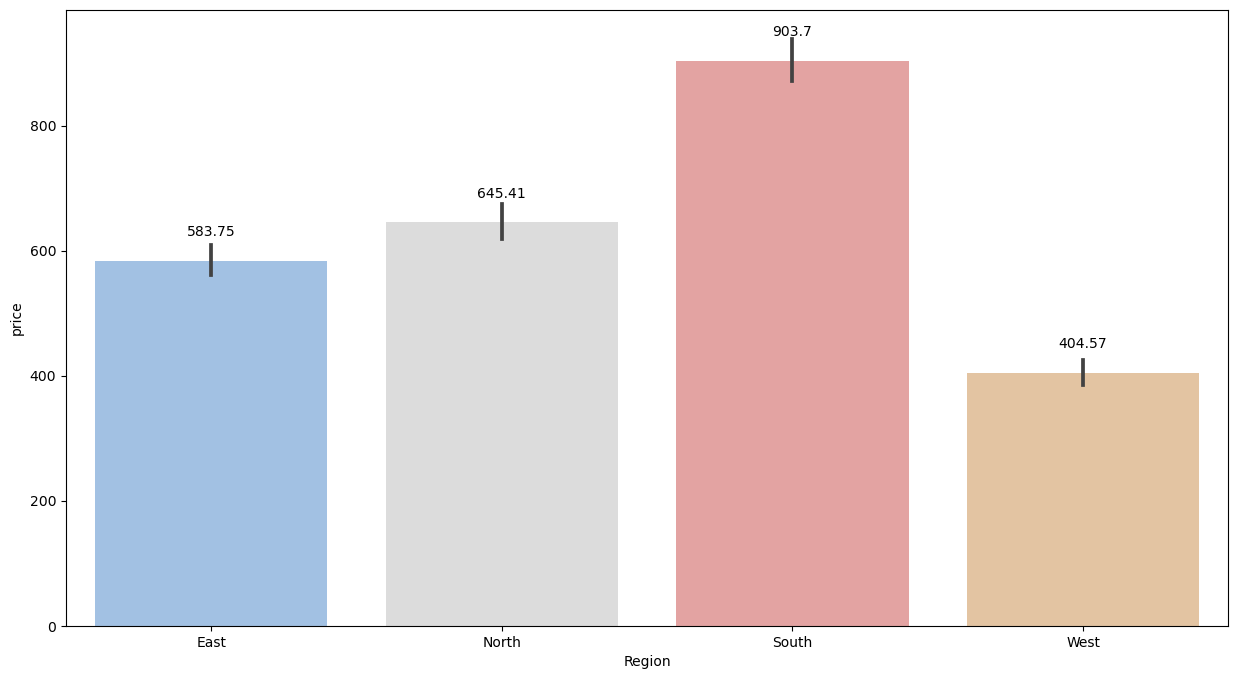

In [339]:
sns.barplot(x = df_airbnb['Region'].sort_values() , y = df_airbnb['price'], palette = colors)

for i,v in enumerate(round(df_airbnb.groupby(by = 'Region')['price'].mean().sort_index(),2)):
    plt.text(x = i , y = v + 40, s = v, ha = 'center')

#### Region vs Instant_bookable

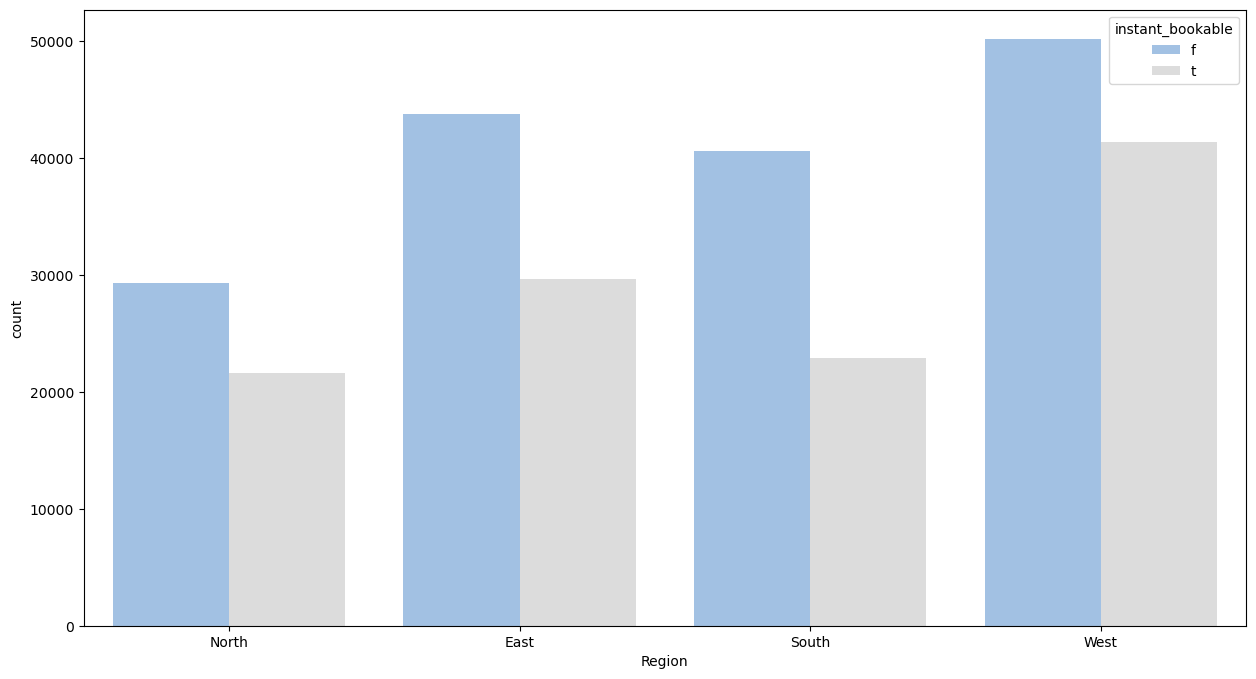

In [340]:
sns.countplot(x = df_airbnb['Region'], hue = df_airbnb['instant_bookable'], palette = colors)
plt.show()

### Multivariate Analysis

#### City vs Price vs Instant bookable

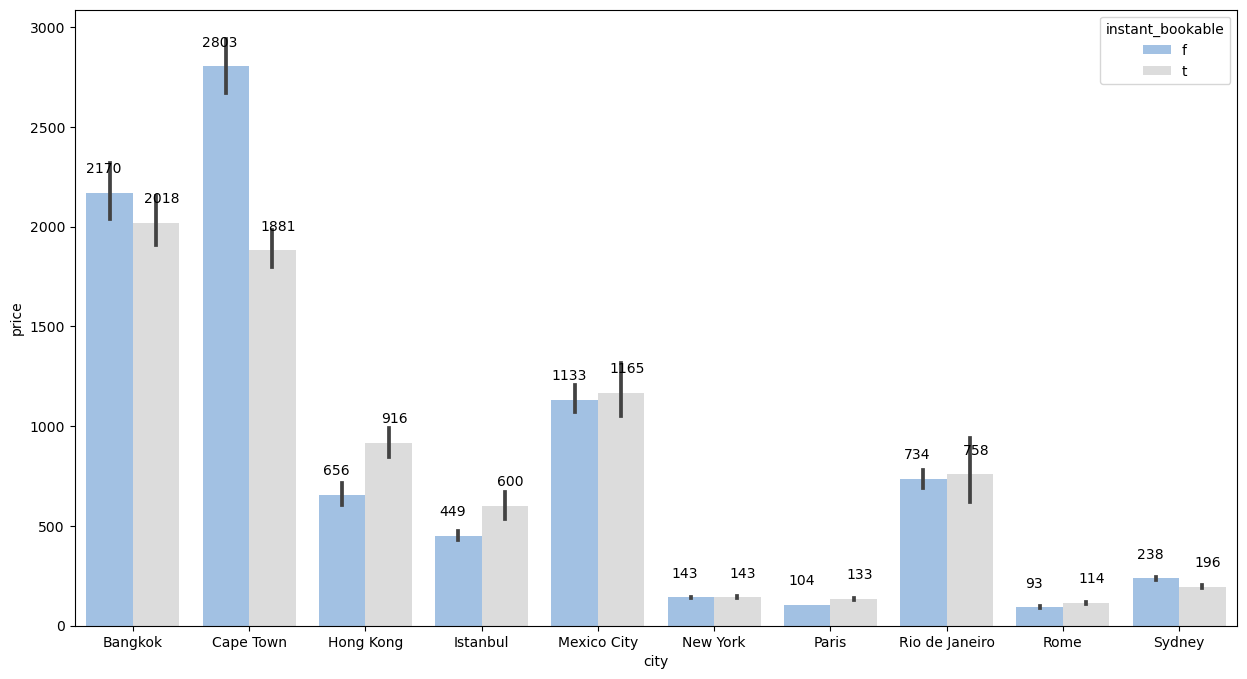

In [341]:
sns.barplot(x = df_airbnb['city'].sort_values(), y = df_airbnb['price'], hue = df_airbnb['instant_bookable'],
            palette = colors)


for i,v in enumerate(df_airbnb.groupby(['city','instant_bookable'])['price'].mean()):
    plt.text(x = i/2 - 0.25, y = v + 100, s = round(v) , ha = 'center')

#### Host_identity_verified vs Price vs Instant bookable

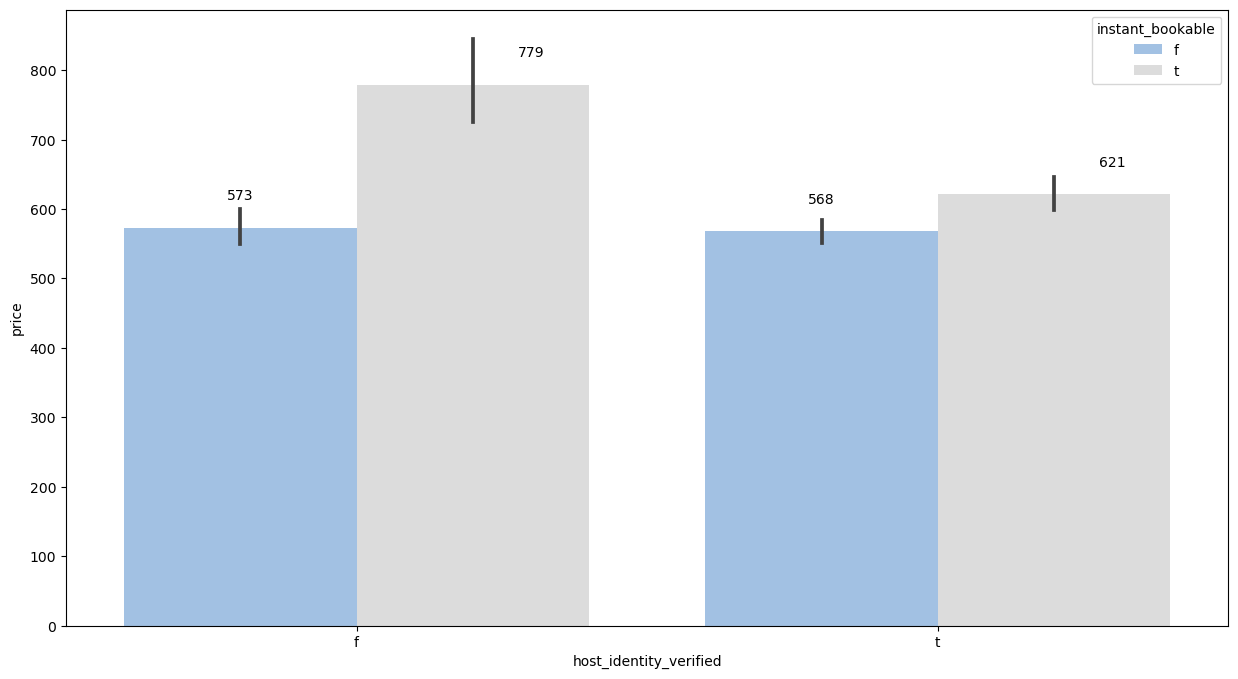

In [342]:
sns.barplot(x = df_airbnb['host_identity_verified'].sort_values(), y = df_airbnb['price'], 
            hue = df_airbnb['instant_bookable'],palette = colors)


for i,v in enumerate(df_airbnb.groupby(['host_identity_verified','instant_bookable'])['price'].mean()):
    plt.text(x = i/2 - 0.2, y = v + 40, s = round(v) , ha = 'center')

#### Room_type vs Price vs Instant bookable

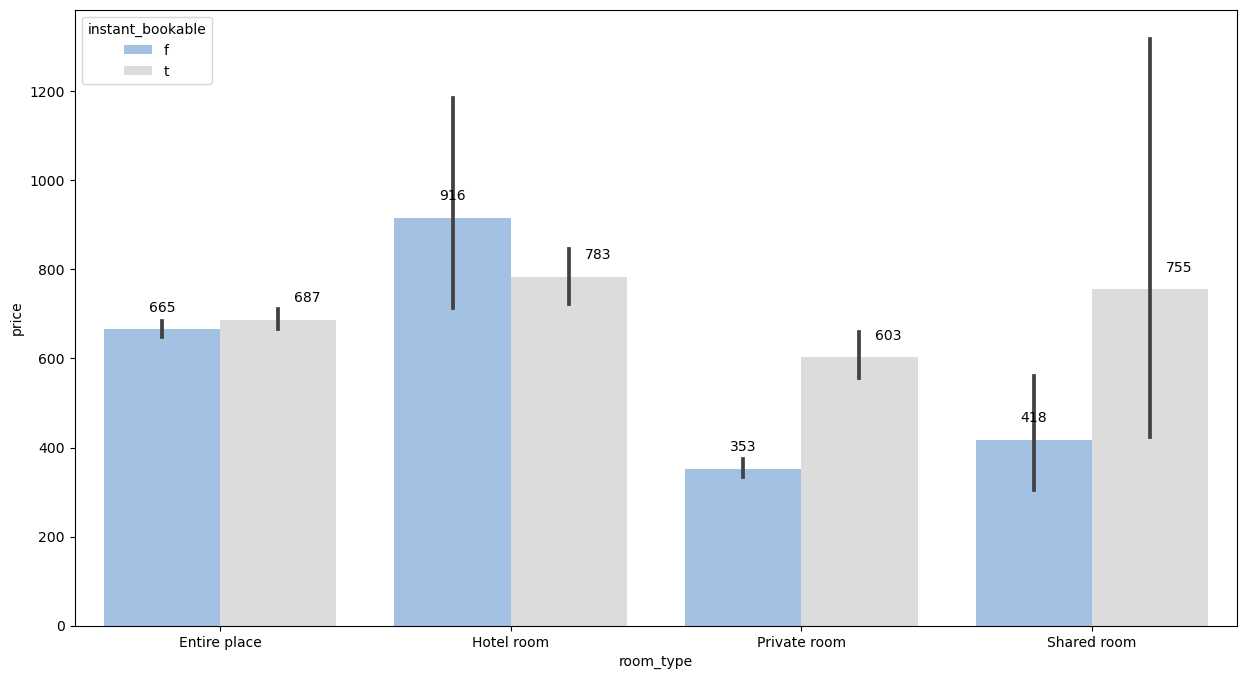

In [343]:
sns.barplot(x = df_airbnb['room_type'].sort_values(), y = df_airbnb['price'], hue = df_airbnb['instant_bookable'],
           palette = colors)


for i,v in enumerate(df_airbnb.groupby(['room_type','instant_bookable'])['price'].mean()):
    plt.text(x = i/2 - 0.2, y = v + 40, s = round(v) , ha = 'center')

#### Region vs Price vs Instant_bookable

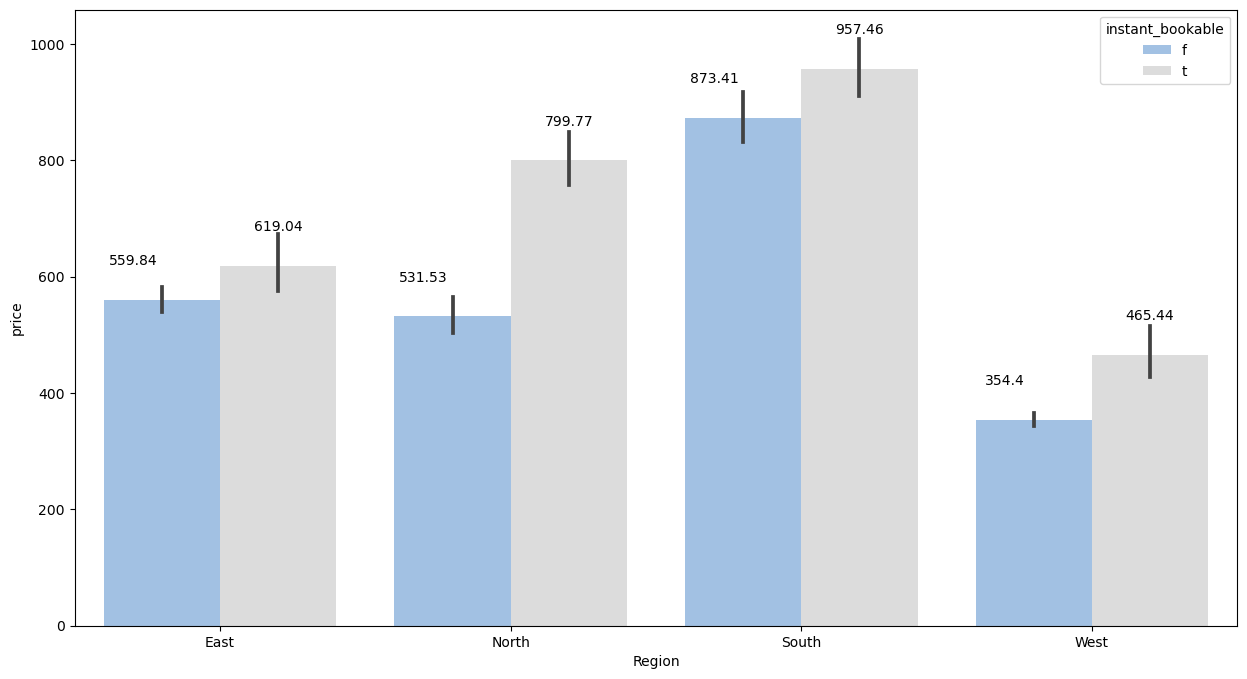

In [344]:
sns.barplot(x = df_airbnb['Region'].sort_values() , y = df_airbnb['price'], hue = df_airbnb['instant_bookable'] ,
            palette = colors)

for i,v in enumerate(round(df_airbnb.groupby(by = ['Region','instant_bookable'])['price'].mean().sort_index(),2)):
    plt.text(x = i - i/2 - 0.3, y = v + 60, s = v, ha = 'center')

#### Accomodates vs City vs Instant bookable

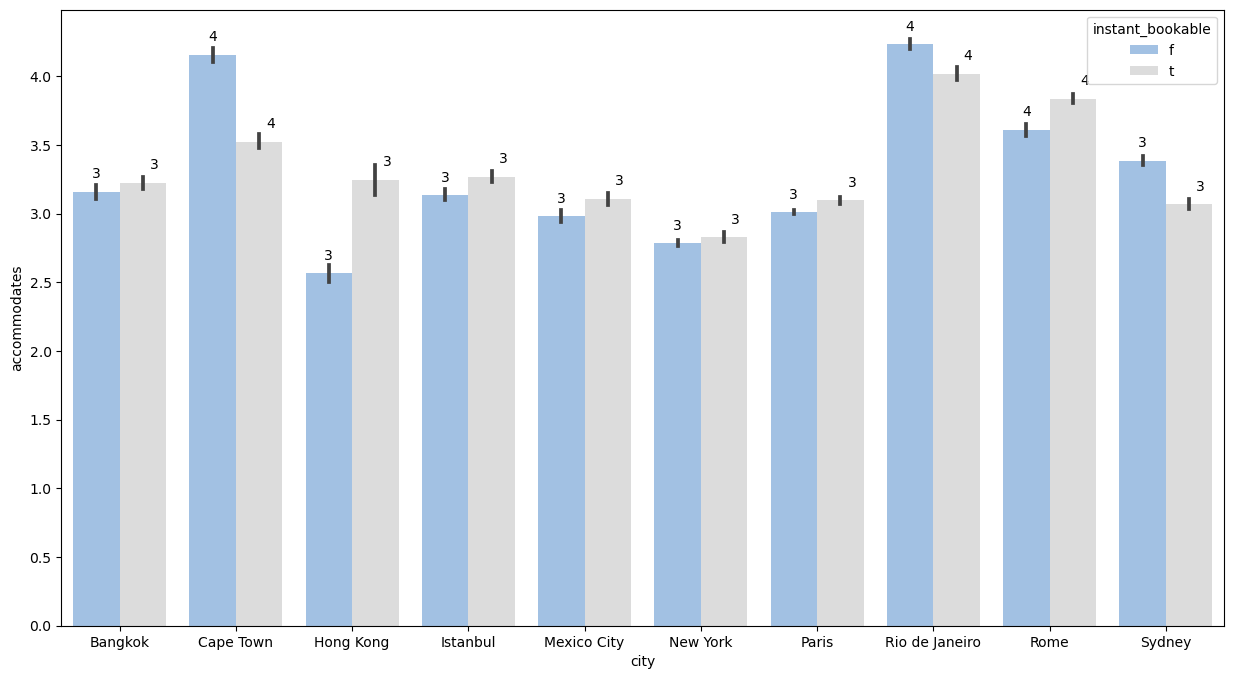

In [345]:
sns.barplot(x = df_airbnb['city'].sort_values(), y = df_airbnb['accommodates'], hue = df_airbnb['instant_bookable']
           ,palette = colors)


for i,v in enumerate(df_airbnb.groupby(['city','instant_bookable'])['accommodates'].mean()):
    plt.text(x = i/2 - 0.2, y = v + 0.1 , s = round(v) , ha = 'center')

#### City vs Review score rating vs Instant bookable

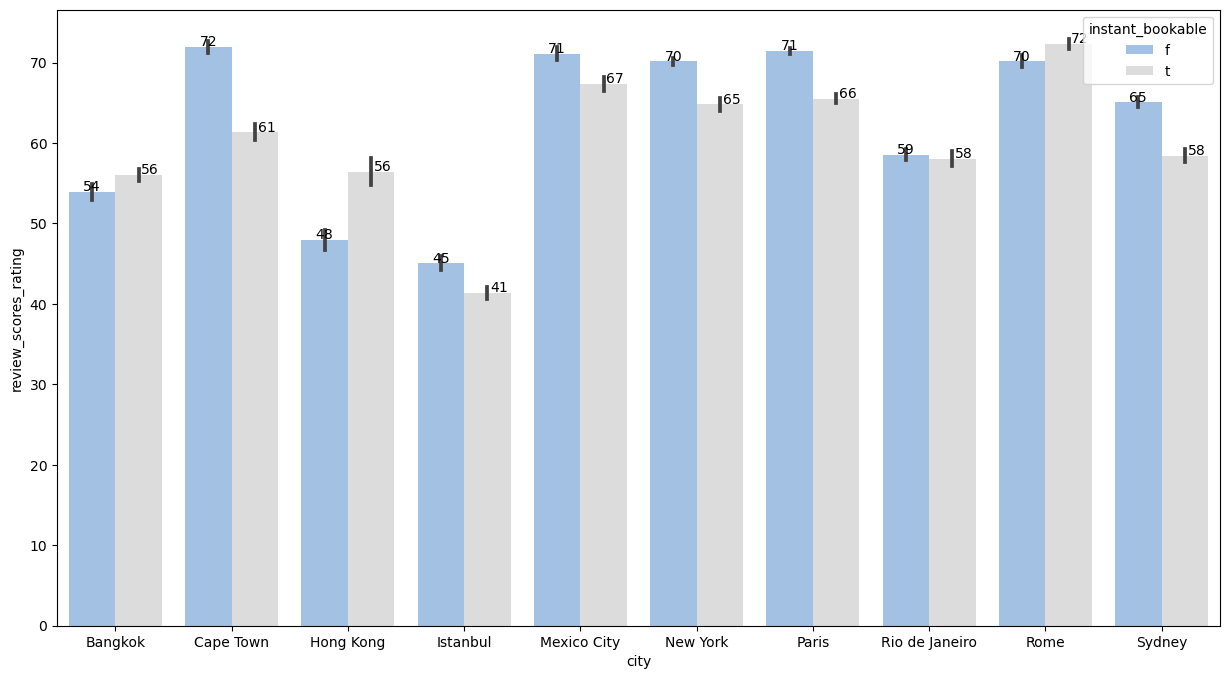

In [346]:
sns.barplot(x = df_airbnb['city'].sort_values(), y = df_airbnb['review_scores_rating'], 
            hue = df_airbnb['instant_bookable'],palette = colors)


for i,v in enumerate(df_airbnb.groupby(['city','instant_bookable'])['review_scores_rating'].mean()):
    plt.text(x = i/2 - 0.2, y = v + 0.1 , s = round(v) , ha = 'center')

#### Accomodates vs price vs Instant bookable

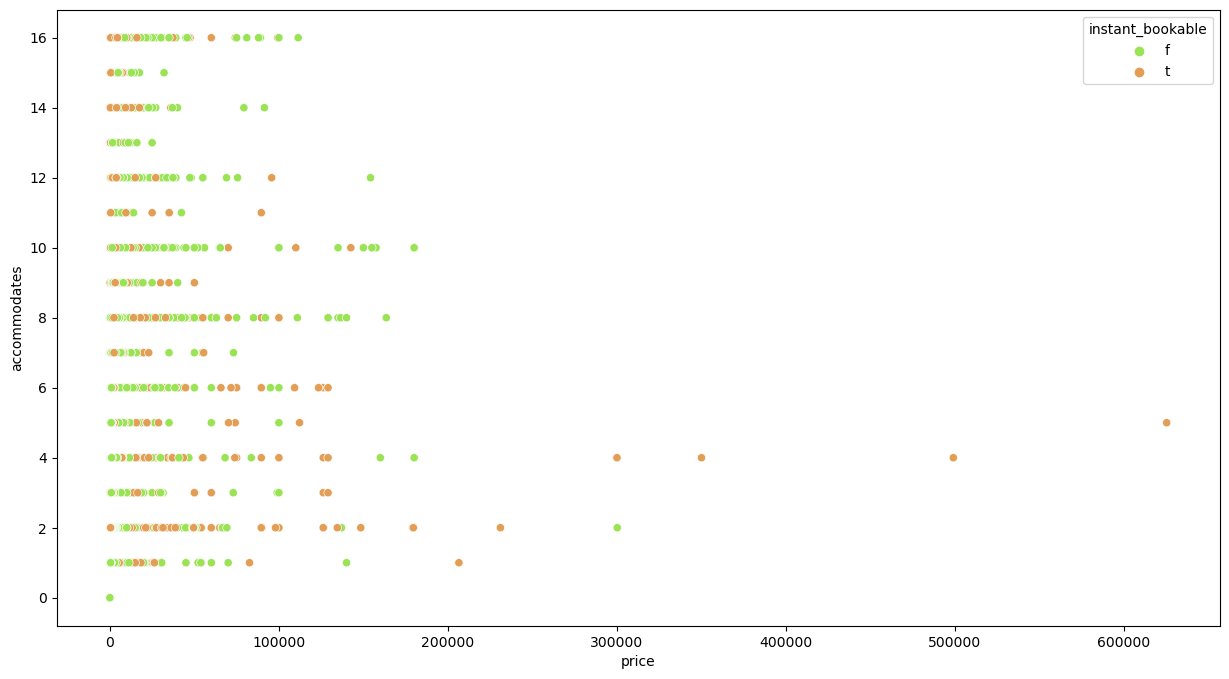

In [347]:
sns.scatterplot(x = df_airbnb['price'], y = df_airbnb['accommodates'], hue = df_airbnb['instant_bookable']
               ,palette = ['#9ae355','#e39e55'])

plt.show()

#### Price vs Bedrooms vs Instant bookable

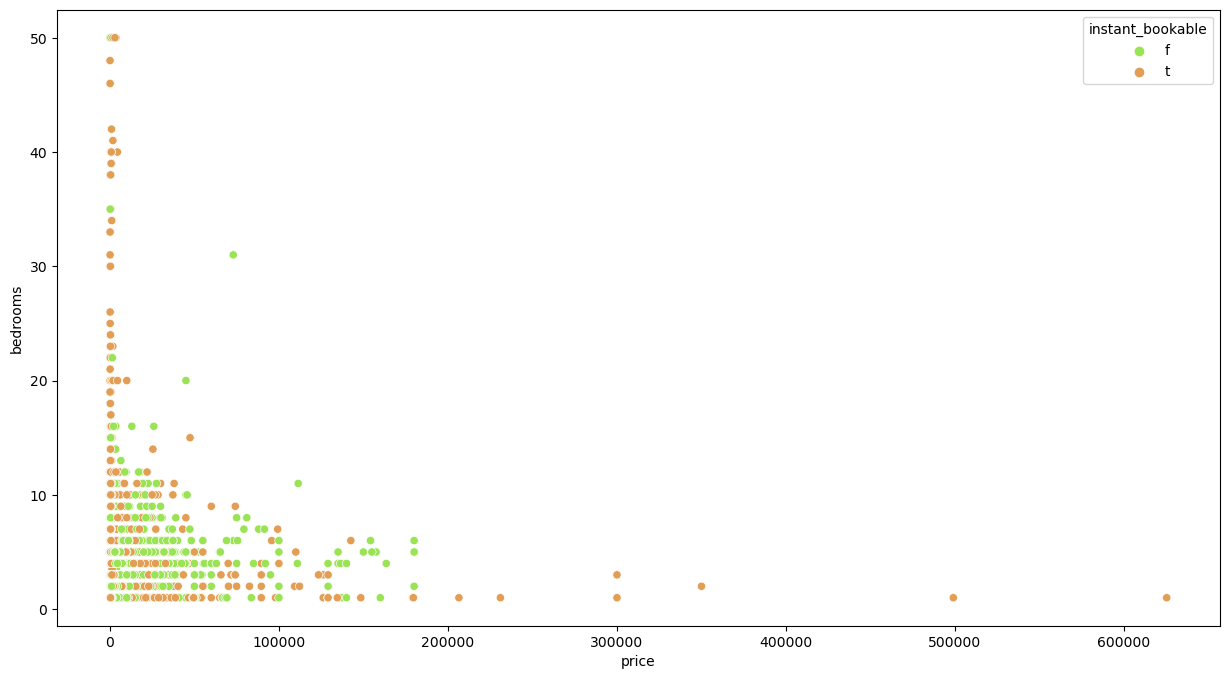

In [348]:
sns.scatterplot(x = df_airbnb['price'], y = df_airbnb['bedrooms'], hue = df_airbnb['instant_bookable']
               ,palette = ['#9ae355','#e39e55'])

plt.show()

#### Bedrooms vs Accommodates vs Instant bookable

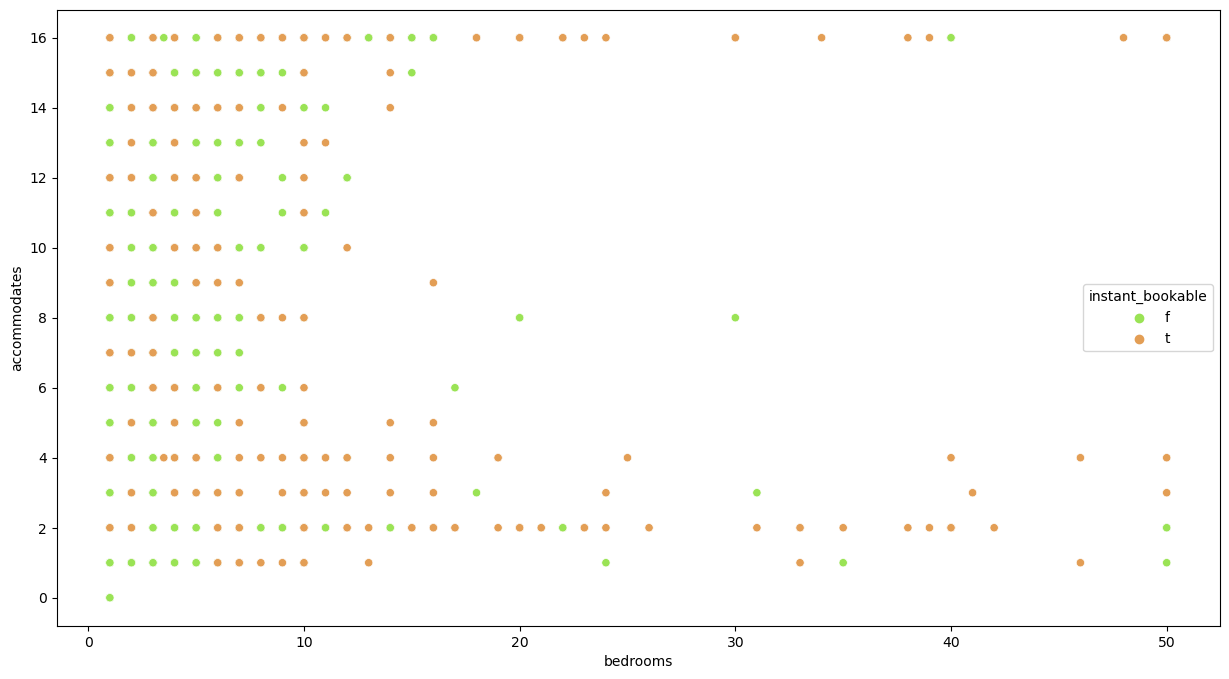

In [349]:
sns.scatterplot(x = df_airbnb['bedrooms'], y = df_airbnb['accommodates'], hue = df_airbnb['instant_bookable']
               ,palette = ['#9ae355','#e39e55'])
plt.show()

#### Checking correlation with heatmap

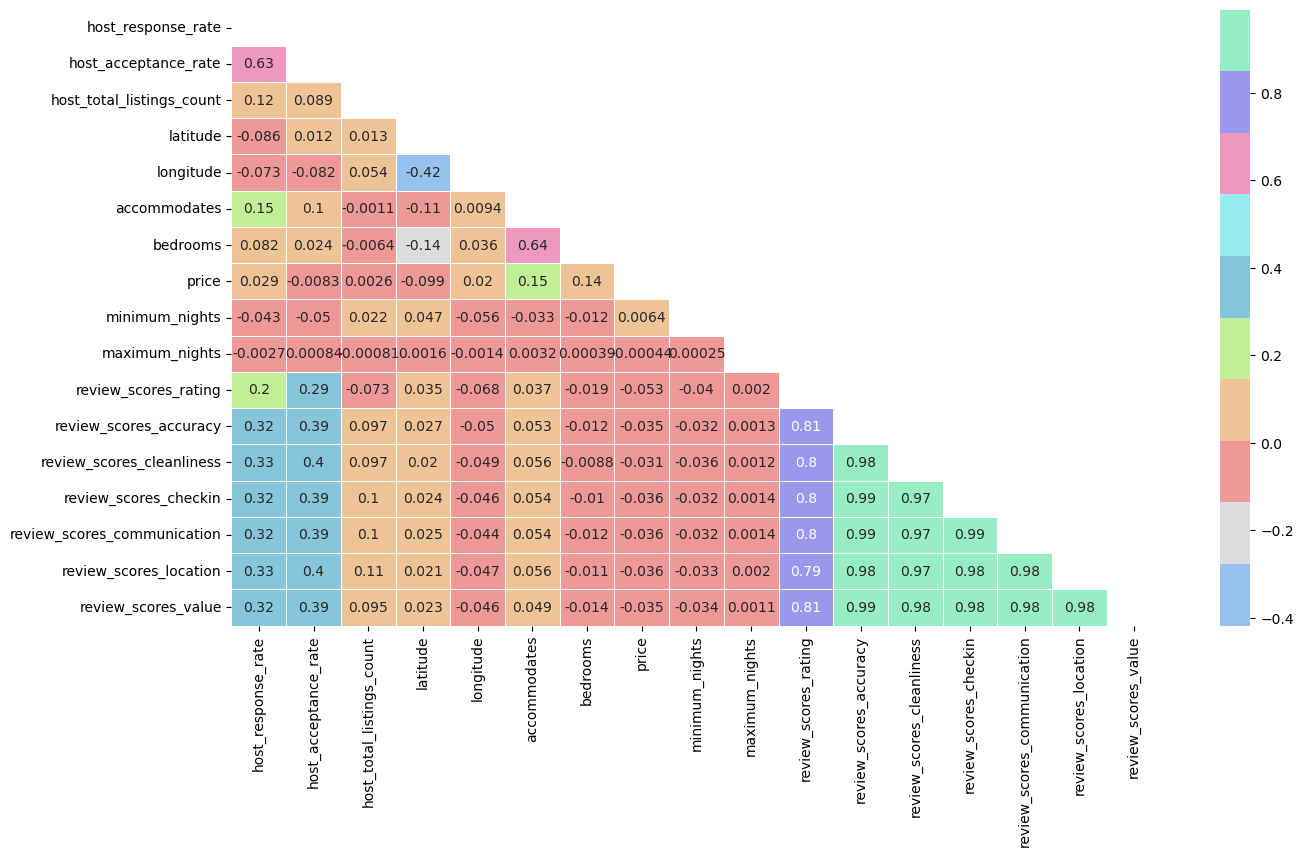

In [350]:
sns.heatmap(df_airbnb.corr(), annot = True, cmap = colors,linewidth = 0.6,mask = np.triu(df_airbnb.corr()))
plt.show()

### Performing hypothesis testing to find the significant variables

Hypothesis :
    
H0 (Null Hypothesis) : There is no significant relationship between the variables being tested.

Ha (Alternative Hypothesis) : There is a significant relationship between the variables being tested
    
Consider significance level as 0.05

In [351]:
num_cols = df_airbnb.select_dtypes(include = np.number).columns
num_cols

Index(['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bedrooms', 'price', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

In [352]:
# Creating a dataframe to store the values

statistical_result = pd.DataFrame(columns = ['Columns','Pvalue','Remarks'])

In [353]:
# Numerical vs Categorical(Instant_bookable) - f_oneway

for i in num_cols:
    groups = [df_airbnb.loc[df_airbnb['instant_bookable'] == subclass , i] for subclass 
              in df_airbnb['instant_bookable'].unique()]
    
    stat , pval = stats.f_oneway(*groups)
    
    statistical_result = statistical_result.append({'Columns': i , 'Pvalue': pval ,
                                                    'Remarks': 'Reject H0' if pval < 0.05 else 'Failed to reject H0'},
                                                  ignore_index = True)

In [354]:
cat_cols = df_airbnb.select_dtypes(exclude = np.number).columns.to_list()
print(cat_cols)

['host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'city', 'property_type', 'room_type', 'amenities', 'instant_bookable', 'Region']


host_since is a datetime object and instant bookable is the target variable so we should remove it from cat_cols

In [355]:
cat_cols.remove('instant_bookable')
print(cat_cols)

['host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'city', 'property_type', 'room_type', 'amenities', 'Region']


In [356]:
# Categorical vs Categorical(Instant_bookable) - chi2_contingency

for i in cat_cols:
    stat , pval , dof , expected = stats.chi2_contingency(pd.crosstab(df_airbnb[i],df_airbnb['instant_bookable']))
    
    statistical_result = statistical_result.append({'Columns':i , 'Pvalue': pval ,
                                                   'Remarks' : 'Reject H0' if pval < 0.05 else 'Failed to reject H0'},
                                                  ignore_index = True)

In [357]:
statistical_result

Columns         Pvalue              Remarks
0            host_response_rate   0.000000e+00            Reject H0
1          host_acceptance_rate   0.000000e+00            Reject H0
2     host_total_listings_count   0.000000e+00            Reject H0
3                      latitude   1.218462e-01  Failed to reject H0
4                     longitude  1.115112e-134            Reject H0
5                  accommodates   1.290423e-06            Reject H0
6                      bedrooms   4.834544e-18            Reject H0
7                         price   5.595255e-13            Reject H0
8                minimum_nights  1.209669e-123            Reject H0
9                maximum_nights   6.246272e-01  Failed to reject H0
10         review_scores_rating  1.805145e-184            Reject H0
11       review_scores_accuracy   1.411651e-43            Reject H0
12    review_scores_cleanliness   3.888389e-21            Reject H0
13        review_scores_checkin   7.071339e-35            Reject H0
14  review_scores_communication   3.402854e-39            Reject H0
15       review_scores_location   1.199631e-22            Reject H0
16          review_scores_value   2.815450e-37            Reject H0
17           host_response_time   0.000000e+00            Reject H0
18            host_is_superhost   3.887066e-79            Reject H0
19         host_has_profile_pic   3.101958e-01  Failed to reject H0
20       host_identity_verified   1.208082e-03            Reject H0
21                neighbourhood   0.000000e+00            Reject H0
22                         city   0.000000e+00            Reject H0
23                property_type   0.000000e+00            Reject H0
24                    room_type   0.000000e+00            Reject H0
25                    amenities  1.482095e-185            Reject H0
26                       Region  9.855187e-292            Reject H0

### Insights from statistical test

From above performed statistical tests we can conclude that all of the columns except latitude and maximum_nights has rejected null hypotheses which means the columns are significant to the target variable instant_bookable. The variables latitude , maximum_nights and host_has_profile_pic can be dropped as they are insignificant to the target variable. Longitude alone doesnt make sense to the model so removing longitude also.

In [358]:
df_airbnb.drop(columns = ['latitude','longitude','maximum_nights','host_has_profile_pic'] , inplace = True)

### Amenities Wordcloud

In [359]:
from nltk.corpus import stopwords

In [360]:
stop_words = list(set(stopwords.words('english') + list(STOPWORDS)))

In [361]:
df_airbnb['amenities'] = df_airbnb['amenities'].apply(lambda x : ast.literal_eval(x))

In [362]:
# Extracting words without numbers and special characters

df_airbnb['amenities'] = df_airbnb['amenities'].apply(lambda x : re.sub('[^a-z]+', ' ', ' '.join(x).lower()))

In [363]:
# Doing Lemmatization

from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

df_airbnb['amenities'] = df_airbnb['amenities'].apply(lambda x : ' '.join([ wnl.lemmatize(i)  for i in x.split()]))

In [364]:
# Extracting words which are not in stop words

df_airbnb['amenities'] = df_airbnb['amenities'].apply(lambda x : ' '.join([ i for i in x.split() if i not in stop_words]))

In [365]:
# Creating a list with all rows of amenities

comment_words = []

for i in df_airbnb['amenities']:
    
    i = i.split()
    
    for j in i:
        comment_words.append(j)

In [366]:
# Converting comment_words into series and taking frequency of each words

comment_words = pd.Series(comment_words).value_counts()

In [442]:
comment_words

allowed       297524
dryer         283306
tv            276153
wifi          271989
essential     259526
               ...  
seda               1
duo                1
integrados         1
riadas             1
control            1
Length: 1777, dtype: int64

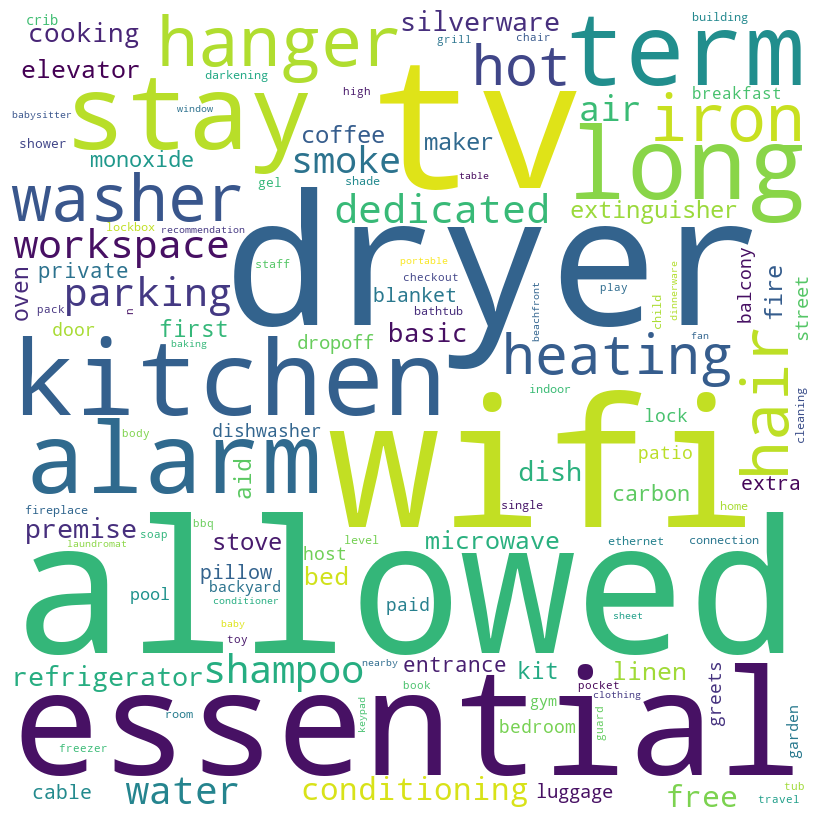

In [367]:
# Generating wordcloud 

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                max_words = 1000,
                min_font_size = 10).generate_from_frequencies(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [368]:
# Considering top 20 words

top_words = comment_words[:20].index.to_list()

print(top_words)

['allowed', 'dryer', 'tv', 'wifi', 'essential', 'kitchen', 'stay', 'long', 'term', 'alarm', 'hanger', 'hair', 'iron', 'washer', 'heating', 'hot', 'workspace', 'dedicated', 'parking', 'shampoo']


In [369]:
df_airbnb['amenities'] = df_airbnb['amenities'].map(lambda x : ' '.join([ i for i in x.split() if i in top_words]))

### Splitting the dataset randomly into train and test dataset using ratio of 70:30

In [370]:
x = df_airbnb.drop(columns = ['instant_bookable'])
y = df_airbnb['instant_bookable']

xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size = 0.30,random_state = 24,stratify=y)

### Checking and treating of outliers

In [371]:
num_cols = xtrain.select_dtypes(include = np.number).columns
num_cols

Index(['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'accommodates', 'bedrooms', 'price',
       'minimum_nights', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

### For train data

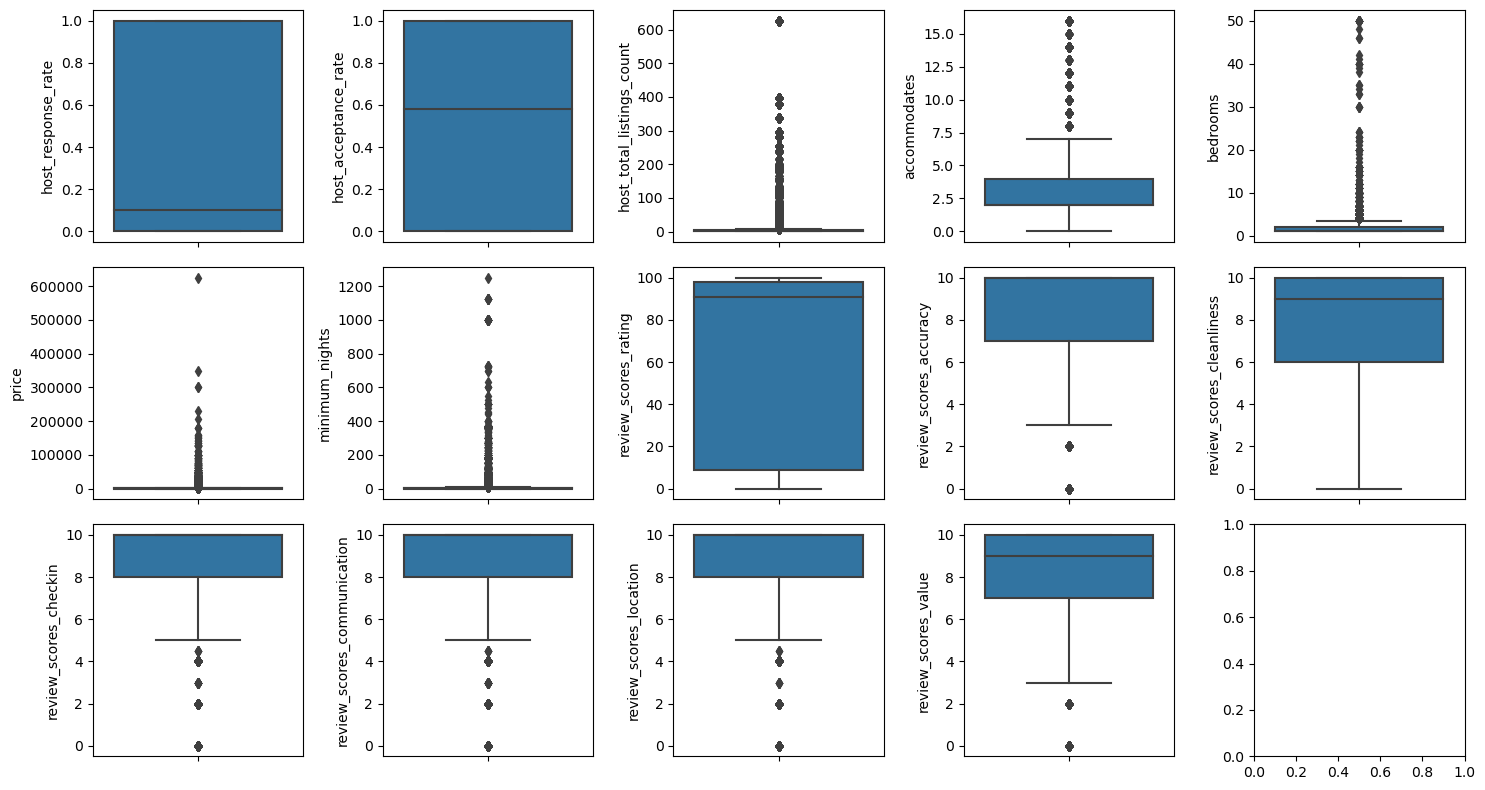

In [372]:
f , ax = plt.subplots(3,5)

for i,v in zip(num_cols,ax.flatten()):
    sns.boxplot(y = xtrain[i] , ax = v)
    
plt.tight_layout()
plt.show()

### For test data

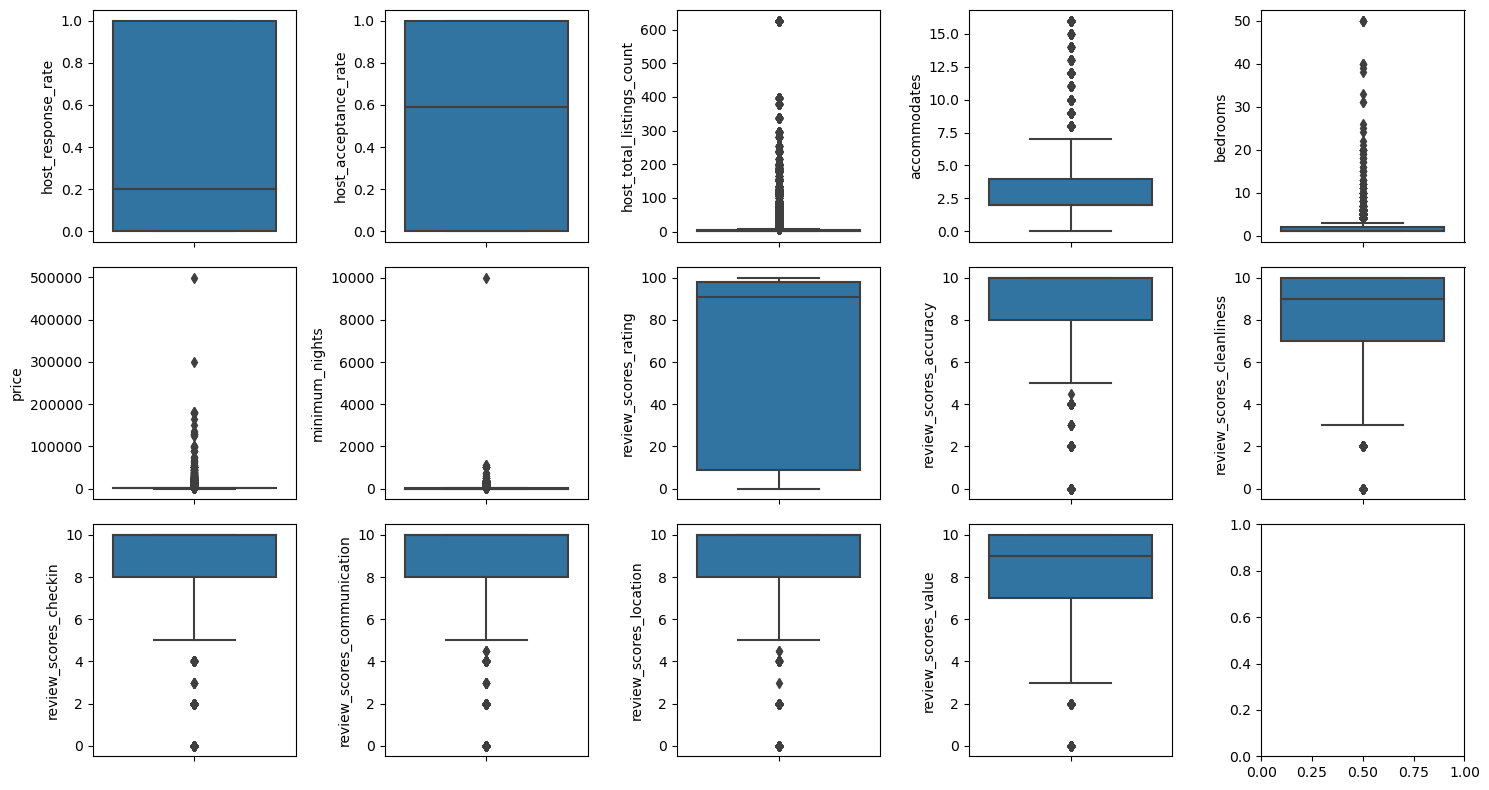

In [373]:
f , ax = plt.subplots(3,5)

for i,v in zip(num_cols,ax.flatten()):
    sns.boxplot(y = xtest[i] , ax = v)
    
plt.tight_layout()
plt.show()

From above box plots it is clearly evident that there are outliers . By doing IQR method we tend lose data. Hence we go forward by doing transformation technique

In [374]:
out_cols = ['host_total_listings_count','accommodates','bedrooms','price','minimum_nights','review_scores_accuracy',
           'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
           'review_scores_cleanliness']

In [375]:
pt = PowerTransformer()

for i in out_cols:
    variable = pt.fit(xtrain[[i]])
    xtrain[i] = pt.transform(xtrain[[i]])
    
    with open(f'Transformation\\{i}.pkl','wb') as file:
        pickle.dump(variable,file)
    
    xtest[i] = pt.transform(xtest[[i]])

### Scaling of Numerical variables

In [378]:
num_cols = ['host_response_rate','host_acceptance_rate','host_total_listings_count', 
           'accommodates','bedrooms','price','minimum_nights','review_scores_rating','review_scores_location']

ss = StandardScaler()

for i in num_cols:
    variable = ss.fit(xtrain[[i]])
    xtrain[i] = ss.transform(xtrain[[i]])
    
    with open(f'Scaling\\scaling_{i}.pkl','wb') as file:
        pickle.dump(variable,file)
    
    
    xtest[i] = ss.transform(xtest[[i]])

### Encoding of Categorical variables

In [379]:
cat_cols = xtrain.select_dtypes(exclude = np.number).columns.to_list()
print(cat_cols)

['host_response_time', 'host_is_superhost', 'host_identity_verified', 'neighbourhood', 'city', 'property_type', 'room_type', 'amenities', 'Region']


#### Host_response_time

In [380]:
xtrain['host_response_time'].unique()

array(['unknown', 'within a day', 'within an hour', 'within a few hours',
       'a few days or more'], dtype=object)

Host response time variable is a ordinal categorical variable. It has a hierarchy between the subclasses. The host who responds within a few hours is more likely to get instant bookability than the host who responds a few days or more

In [381]:
oe = OrdinalEncoder(categories = [['unknown','a few days or more','within a day','within an hour','within a few hours']])

oe_encoder = oe.fit(xtrain[['host_response_time']])

xtrain['host_response_time'] = oe.transform(xtrain[['host_response_time']])

xtest['host_response_time'] = oe.transform(xtest[['host_response_time']])

xtrain['host_response_time'].unique()

array([0., 2., 3., 4., 1.])

In [382]:
with open('Encoders\\encoder_host_response_time.pkl','wb') as file:
    pickle.dump(oe_encoder,file)

#### Host_is_superhost

In [383]:
xtrain['host_is_superhost'].unique()

array(['t', 'f'], dtype=object)

Host_is_superhost variable is a nominal categorical variable. There is no hierarchy between the subclasses. Hence we can replace true with 1 and false with 0

In [384]:
xtrain['host_is_superhost'].replace({'t':1,'f':0} , inplace = True)
xtest['host_is_superhost'].replace({'t':1,'f':0} , inplace = True)

#### Host_identity_verified

In [385]:
xtrain['host_identity_verified'].unique()

array(['t', 'f'], dtype=object)

Host_identity_verified variable is a nominal categorical variable. There is no hierarchy between the subclasses. Hence we can replace true with 1 and false with 0

In [386]:
xtrain['host_identity_verified'].replace({'t':1,'f':0} , inplace = True)
xtest['host_identity_verified'].replace({'t':1,'f':0} , inplace = True)

#### Instant_bookable

In [387]:
ytrain.unique()

array(['f', 't'], dtype=object)

Instant_bookable is a target variable. It is binary classification. Hence we can replace true with 1 and false with 0

In [388]:
ytrain.replace({'t':1,'f':0} , inplace = True)
ytest.replace({'t':1,'f':0} , inplace = True)

#### Neighbourhood

In [389]:
xtrain['neighbourhood'].nunique()

651

In [390]:
xtest['neighbourhood'].nunique()

608

Neighbourhood variable is a nominal categorical variable. There is no hierarchy between the subclasses. But there is more than 600 subclasses. Hence we can do woe encoding

In [391]:
neighbourhood_woe = WOEEncoder()

woe_encoder = neighbourhood_woe.fit(xtrain['neighbourhood'] , ytrain)

xtrain['neighbourhood'] = woe_encoder.transform(xtrain['neighbourhood'] , ytrain)
xtest['neighbourhood'] = woe_encoder.transform(xtest['neighbourhood'] , ytest)

In [392]:
with open('Encoders\\encoder_neighbourhood.pkl','wb') as file:
    pickle.dump(woe_encoder,file)

#### City

In [393]:
xtrain['city'].unique()

array(['Cape Town', 'Istanbul', 'Rio de Janeiro', 'Rome', 'New York',
       'Paris', 'Sydney', 'Mexico City', 'Hong Kong', 'Bangkok'],
      dtype=object)

City variable is a nominal categorical variable. There is no hierarchy between the subclasses. Since there is 10 subclasses we can do woe encoding

In [394]:
city_woe = WOEEncoder()

woe_encoder_city = city_woe.fit(xtrain['city'] , ytrain)

xtrain['city'] = woe_encoder_city.transform(xtrain['city'] , ytrain)
xtest['city'] = woe_encoder_city.transform(xtest['city'] , ytest)

In [395]:
with open('Encoders\\encoder_city.pkl','wb') as file:
    pickle.dump(woe_encoder_city,file)

#### Room_type

In [396]:
xtrain['room_type'].unique()

array(['Entire place', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

Room type variable is a ordinal categorical variable. It has a hierarchy between the subclasses.

In [397]:
oe = OrdinalEncoder(categories = [['Shared room','Private room','Hotel room','Entire place']])

oe_room_type = oe.fit(xtrain[['room_type']])

xtrain['room_type'] = oe_room_type.transform(xtrain[['room_type']])
xtest['room_type'] = oe_room_type.transform(xtest[['room_type']])

xtrain['room_type'].unique()

array([3., 1., 2., 0.])

In [398]:
with open('Encoders\\encoder_room_type.pkl','wb') as file:
    pickle.dump(oe_room_type,file)

#### Regions

In [399]:
xtrain['Region'].unique()

array(['North', 'West', 'East', 'South'], dtype=object)

Regions variable is a nominal categorical variable. We can perform woe encoding technique.

In [400]:
regions_woe = WOEEncoder()

woe_region = regions_woe.fit(xtrain['Region'] , ytrain)

xtrain['Region'] = woe_region.transform(xtrain['Region'] , ytrain)
xtest['Region'] = woe_region.transform(xtest['Region'] , ytest)

In [401]:
with open('Encoders\\encoder_region.pkl','wb') as file:
    pickle.dump(woe_region,file)

#### Property_type

Property type variable is a nominal categorical variable. We can perform woe encoding technique.

In [402]:
property_woe = WOEEncoder()

woe_property_type = property_woe.fit(xtrain['property_type'] , ytrain)

xtrain['property_type'] = woe_property_type.transform(xtrain['property_type'] , ytrain)
xtest['property_type'] = woe_property_type.transform(xtest['property_type'] , ytest)

In [403]:
with open('Encoders\\encoder_property_type.pkl','wb') as file:
    pickle.dump(woe_property_type,file)

### Checking for Multicollinearity

In [404]:
xtrain.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood', 'city', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'Region'],
      dtype='object')

In [408]:
num_cols = ['host_response_rate','host_acceptance_rate','host_total_listings_count',
           'accommodates','bedrooms','price','minimum_nights','review_scores_rating','review_scores_accuracy',
           'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
           'review_scores_value']

In [409]:
# Creating a copy of the dataset

xtrain_copy = xtrain.copy()

# considering only numerical variables to check multicollinearity

xtrain_copy = xtrain_copy.loc[:,num_cols]

#### Plotting of heatmap

<AxesSubplot:>

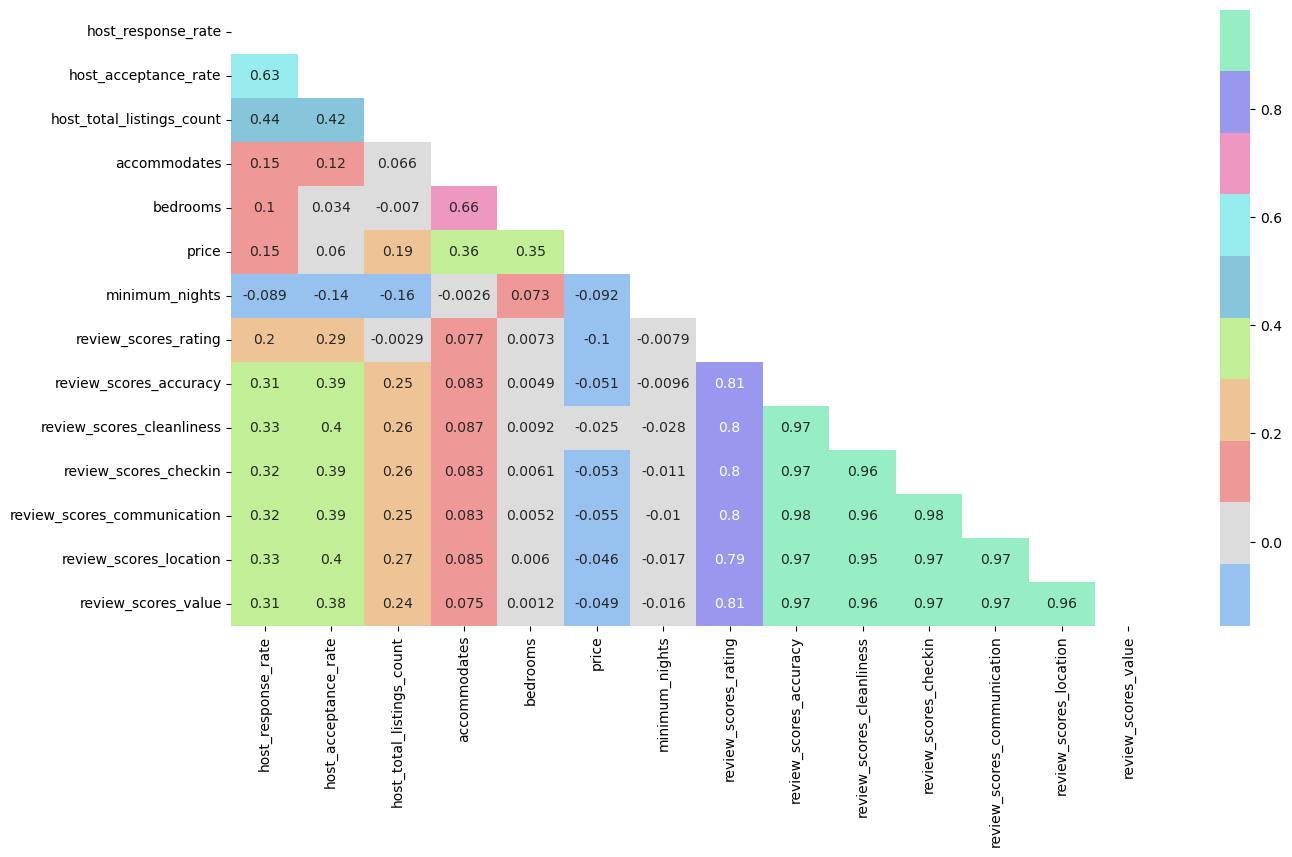

In [410]:
sns.heatmap(xtrain_copy.corr() , annot = True , mask = np.triu(xtrain_copy.corr()) , cmap = colors)

#### Calculating variance inflation factor

In [411]:
vif_values = []

for i in range(xtrain_copy.shape[1]):
    vif_values.append(variance_inflation_factor(xtrain_copy.values,i))
    
vif_df = pd.DataFrame({'Columns': xtrain_copy.columns , 'VIF': vif_values})

vif_df

Columns        VIF
0            host_response_rate   1.817190
1          host_acceptance_rate   1.874335
2     host_total_listings_count   1.589339
3                  accommodates   1.876943
4                      bedrooms   1.868194
5                         price   1.281532
6                minimum_nights   1.058716
7          review_scores_rating   3.487025
8        review_scores_accuracy  35.153015
9     review_scores_cleanliness  18.993631
10        review_scores_checkin  38.780670
11  review_scores_communication  39.865239
12       review_scores_location  22.476415
13          review_scores_value  27.101451

From above dataframe we can infer that there is high multicollinearity in review related variables . First we drop review_scores_communication variable as it has the high vif value and again we check calculate the vif values

In [412]:
# Removing review_scores_communication to calculate vif

xtrain_copy = xtrain_copy.drop(columns = 'review_scores_communication')

vif_values = []

for i in range(xtrain_copy.shape[1]):
    vif_values.append(variance_inflation_factor(xtrain_copy.values,i))
    
vif_df = pd.DataFrame({'Columns': xtrain_copy.columns , 'VIF': vif_values})

vif_df

Columns        VIF
0          host_response_rate   1.817183
1        host_acceptance_rate   1.873861
2   host_total_listings_count   1.589095
3                accommodates   1.876657
4                    bedrooms   1.868190
5                       price   1.280695
6              minimum_nights   1.058607
7        review_scores_rating   3.478044
8      review_scores_accuracy  33.661268
9   review_scores_cleanliness  18.953833
10      review_scores_checkin  28.689667
11     review_scores_location  21.803260
12        review_scores_value  26.456621

We now drop the review_scores_accuracy variable as it has the vif value and again the values for remaning variables

In [413]:
# Removing review_scores_accuracy to calculate vif

xtrain_copy = xtrain_copy.drop(columns = 'review_scores_accuracy')

vif_values = []

for i in range(xtrain_copy.shape[1]):
    vif_values.append(variance_inflation_factor(xtrain_copy.values,i))
    
vif_df = pd.DataFrame({'Columns': xtrain_copy.columns , 'VIF': vif_values})

vif_df

Columns        VIF
0          host_response_rate   1.817171
1        host_acceptance_rate   1.873694
2   host_total_listings_count   1.588611
3                accommodates   1.875761
4                    bedrooms   1.867897
5                       price   1.280166
6              minimum_nights   1.057202
7        review_scores_rating   3.456973
8   review_scores_cleanliness  17.305213
9       review_scores_checkin  25.271312
10     review_scores_location  21.084957
11        review_scores_value  23.568200

We now drop the review_scores_checkin variable as it has the vif value and again the values for remaning variables

In [414]:
# Removing review_scores_checkin to calculate vif

xtrain_copy = xtrain_copy.drop(columns = 'review_scores_checkin')

vif_values = []

for i in range(xtrain_copy.shape[1]):
    vif_values.append(variance_inflation_factor(xtrain_copy.values,i))
    
vif_df = pd.DataFrame({'Columns': xtrain_copy.columns , 'VIF': vif_values})

vif_df

Columns        VIF
0          host_response_rate   1.816301
1        host_acceptance_rate   1.872566
2   host_total_listings_count   1.583795
3                accommodates   1.875268
4                    bedrooms   1.867775
5                       price   1.274894
6              minimum_nights   1.055587
7        review_scores_rating   3.437805
8   review_scores_cleanliness  16.241604
9      review_scores_location  15.729774
10        review_scores_value  21.281308

We now drop the review_scores_value variable as it has the vif value and again the values for remaning variables

In [415]:
# Removing review_scores_value to calculate vif

xtrain_copy = xtrain_copy.drop(columns = 'review_scores_value')

vif_values = []

for i in range(xtrain_copy.shape[1]):
    vif_values.append(variance_inflation_factor(xtrain_copy.values,i))
    
vif_df = pd.DataFrame({'Columns': xtrain_copy.columns , 'VIF': vif_values})

vif_df

Columns        VIF
0         host_response_rate   1.816299
1       host_acceptance_rate   1.872017
2  host_total_listings_count   1.582584
3               accommodates   1.873415
4                   bedrooms   1.867750
5                      price   1.274540
6             minimum_nights   1.055393
7       review_scores_rating   3.359656
8  review_scores_cleanliness  11.262310
9     review_scores_location  11.239094

We now drop the review_scores_cleanliness variable as it has the vif value and again the values for remaning variables

In [416]:
# Removing review_scores_cleanliness to calculate vif

xtrain_copy = xtrain_copy.drop(columns = 'review_scores_cleanliness')

vif_values = []

for i in range(xtrain_copy.shape[1]):
    vif_values.append(variance_inflation_factor(xtrain_copy.values,i))
    
vif_df = pd.DataFrame({'Columns': xtrain_copy.columns , 'VIF': vif_values})

vif_df

Columns       VIF
0         host_response_rate  1.815622
1       host_acceptance_rate  1.871291
2  host_total_listings_count  1.575444
3               accommodates  1.873086
4                   bedrooms  1.867714
5                      price  1.268624
6             minimum_nights  1.055091
7       review_scores_rating  3.153907
8     review_scores_location  3.424648

### Dropping of columns to reduce multicollinearity

In [417]:
# Dropping columns from train data

xtrain.drop(columns = ['review_scores_communication','review_scores_accuracy','review_scores_checkin',
                         'review_scores_value','review_scores_cleanliness'] , inplace = True)

# Dropping columns from test data

xtest.drop(columns = ['review_scores_communication','review_scores_accuracy','review_scores_checkin',
                         'review_scores_value','review_scores_cleanliness'] , inplace = True)

### Performing TFIDF Vectorizer for amenities columns

In [418]:
vectorizer = TfidfVectorizer()

vectorizer.fit(xtrain.loc[:,'amenities'])

TfidfVectorizer()

In [419]:
tf_train = vectorizer.transform(xtrain.loc[:,'amenities'])
tf_test = vectorizer.transform(xtest.loc[:,'amenities'])

In [420]:
len(vectorizer.get_feature_names_out())

20

In [421]:
xtrain.drop(columns = 'amenities',inplace = True)
xtest.drop(columns = 'amenities',inplace = True)

In [422]:
xtrain = xtrain.reset_index(drop=True)
xtest = xtest.reset_index(drop = True)

In [423]:
train_df = pd.DataFrame(tf_train.toarray(), columns = vectorizer.get_feature_names_out())
test_df = pd.DataFrame(tf_test.toarray(), columns = vectorizer.get_feature_names_out())

In [424]:
xtrain = pd.concat([xtrain,train_df], axis =1)
xtest = pd.concat([xtest,test_df], axis = 1)

In [425]:
ytrain = ytrain.reset_index(drop = True)
ytest = ytest.reset_index(drop = True)

### Checking for class imbalance in target variable

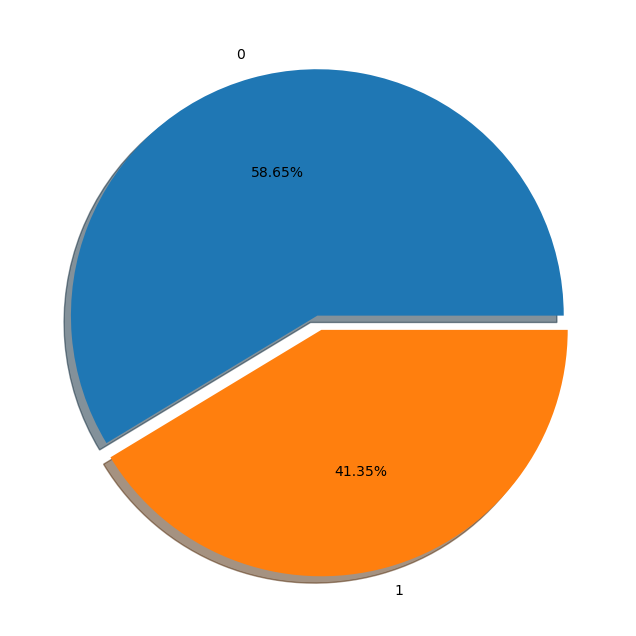

In [426]:
s = ytrain.value_counts()

plt.pie(s , labels = s.index , autopct = '%.2f%%' , shadow = True , explode = [0.01,0.05])
plt.show()

From above pie chart it is clearly evident that there is class imbalance. By using over sampling technique we can overcome this imbalance.

In [427]:
# For train data

sm_train = SMOTE()

xtrain , ytrain = sm_train.fit_resample(xtrain , ytrain)

# For test data

sm_test = SMOTE()

xtest , ytest = sm_test.fit_resample(xtest , ytest)


In [428]:
ytrain.value_counts(normalize = True)

0    0.5
1    0.5
Name: instant_bookable, dtype: float64

### Building a base model

Building a base model using Logistic Regression as it is having the highest explanatory power compared to other models

In [429]:
model_lr = sma.Logit(ytrain,sma.add_constant(xtrain)).fit()

model_lr

Optimization terminated successfully.
         Current function value: 0.612795
         Iterations 6


#### Checking for summary

In [430]:
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       instant_bookable   No. Observations:               229494
Model:                          Logit   Df Residuals:                   229457
Method:                           MLE   Df Model:                           36
Date:                Tue, 13 Jun 2023   Pseudo R-squ.:                  0.1159
Time:                        17:03:12   Log-Likelihood:            -1.4063e+05
converged:                       True   LL-Null:                   -1.5907e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.4951      0.054     -9.227      0.000      -0.600      -0.390
host_response_time           -0.1721      0.010    -17.452      0.000      -0.191      -0.153
host_response_rate            0.1056      0.015      6.868      0.000       0.075       0.136
host_acceptance_rate          0.4159      0.007     63.663      0.000       0.403       0.429
host_is_superhost            -0.1046      0.013     -8.052      0.000      -0.130      -0.079
host_total_listings_count     0.2393      0.006     39.909      0.000       0.228       0.251
host_identity_verified       -0.1249      0.011    -11.490      0.000      -0.146      -0.104
neighbourhood                 0.6982      0.015     47.832      0.000       0.670       0.727
city                         -0.0574      0.018     -3.145      0.002      -0.093      -0.022
property_type                 0.5303      0.013     42.054      0.000       0.506       0.555
room_type                     0.0259      0.006      4.357      0.000       0.014       0.038
accommodates                  0.0488      0.007      7.227      0.000       0.036       0.062
bedrooms                     -0.0352      0.006     -5.628      0.000      -0.047      -0.023
price                        -0.0712      0.006    -11.402      0.000      -0.083      -0.059
minimum_nights               -0.1773      0.005    -34.795      0.000      -0.187      -0.167
review_scores_rating         -0.0197      0.008     -2.378      0.017      -0.036      -0.003
review_scores_location       -0.2564      0.009    -29.980      0.000      -0.273      -0.240
Region                        0.1303      0.035      3.769      0.000       0.063       0.198
alarm                         0.4121      0.027     15.392      0.000       0.360       0.465
allowed                      -0.0629      0.070     -0.898      0.369      -0.200       0.074
dedicated                     2.1095      2.975      0.709      0.478      -3.722       7.941
dryer                         0.3625      0.050      7.276      0.000       0.265       0.460
essential                     1.1149      0.070     15.973      0.000       0.978       1.252
hair                          0.4348      0.063      6.918      0.000       0.312       0.558
hanger                        0.7729      0.048     16.119      0.000       0.679       0.867
heating                      -0.4544      0.043    -10.657      0.000      -0.538      -0.371
hot                           0.1985      0.036      5.557      0.000       0.129       0.269
iron                          0.5733      0.043     13.362      0.000       0.489       0.657
kitchen                       0.0738      0.069      1.077      0.282      -0.061       0.208
long                          3.7737        nan        nan        nan         nan         nan
parking                       0.2307      0.029      7.932      0.000       0.174       0.288
shampoo                       0.2700      0.0

#### Calculating various metrics to evaluate the model performance

In [431]:
pred_prob_train = model_lr.predict(sma.add_constant(xtrain))
pred_prob_test = model_lr.predict(sma.add_constant(xtest))

In [432]:
# Calculating youden's index to convert probability prediction to class prediction

# For train data

fpr , tpr , threshold = roc_curve(ytrain,pred_prob_train)

youden_index_train = []

for i,v in zip(fpr , tpr):
    res = v - i
    youden_index_train.append(res)

yi_train = max(np.round(youden_index_train,2))


# For test data

fpr , tpr , threshold = roc_curve(ytest,pred_prob_test)

youden_index_test = []

for i,v in zip(fpr , tpr):
    res = v - i
    youden_index_test.append(res)

yi_test = max(np.round(youden_index_test,2))

print(f'Youdens index for train data is {yi_train}')
print(f'Youdens index for test data is {yi_test}')

Youdens index for train data is 0.33
Youdens index for test data is 0.33


In [433]:
# Converting probability prediction to class prediction using 0.59 as threshold value

pred_train = [ 1 if i > 0.59 else 0  for i in pred_prob_train]
pred_test = [ 1 if i > 0.59 else 0  for i in pred_prob_test]


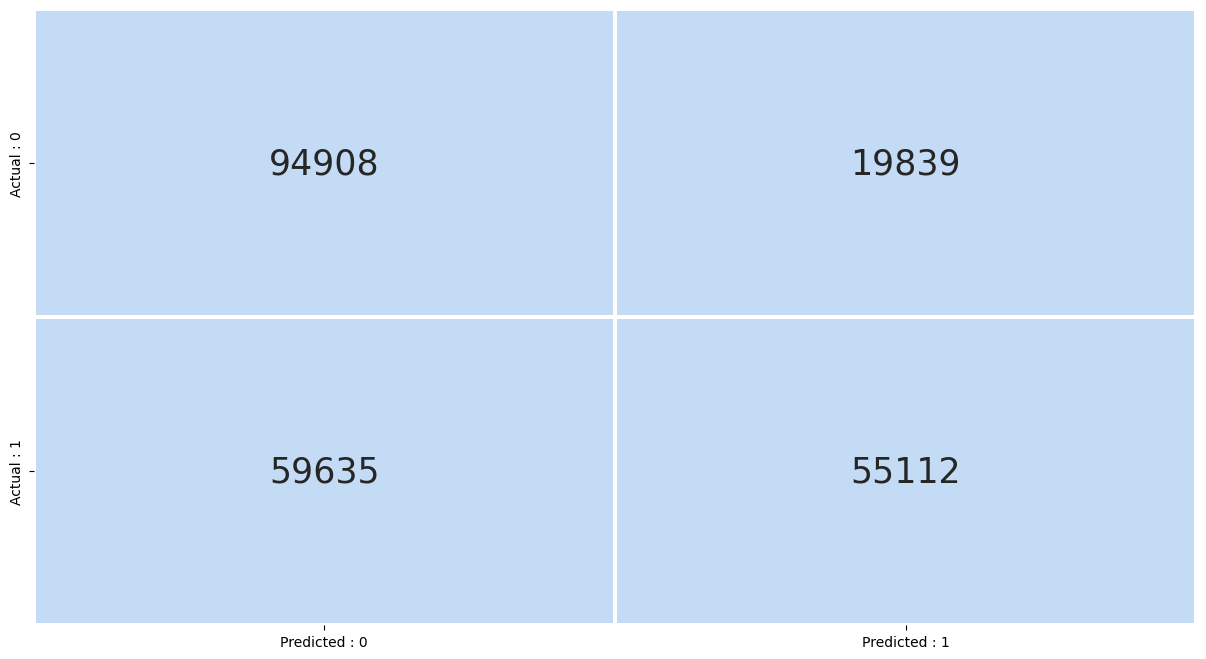

In [434]:
# plotting confusion matrix for train data

cm = confusion_matrix(ytrain,pred_train)
conf_matrix = pd.DataFrame(data = cm , columns = ['Predicted : 0','Predicted : 1'], index = ['Actual : 0','Actual : 1'])
c = ['#c3dbf5']

sns.heatmap(data = conf_matrix, annot = True , cbar = False , fmt = 'd' , cmap = c , linewidth = 1.5 , 
           annot_kws = {'size' : 25})
plt.show()

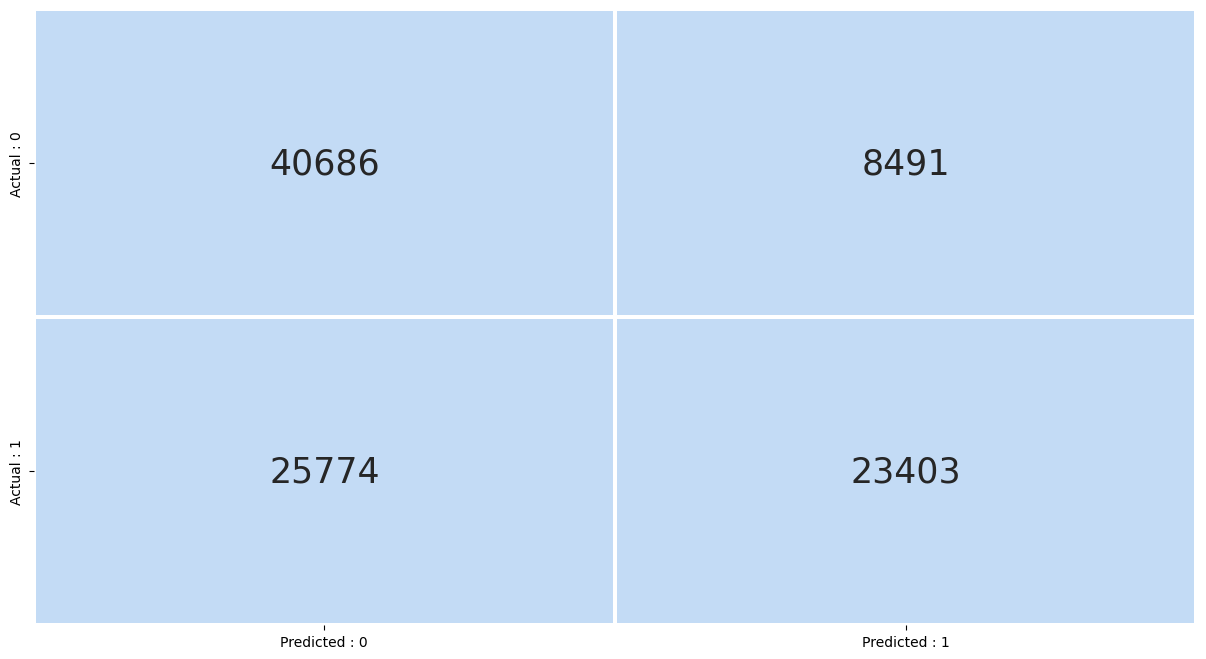

In [435]:
# plotting confusion matrix for test data

cm = confusion_matrix(ytest,pred_test)
conf_matrix = pd.DataFrame(data = cm , columns = ['Predicted : 0','Predicted : 1'], index = ['Actual : 0','Actual : 1'])
c = ['#c3dbf5']

sns.heatmap(data = conf_matrix, annot = True , cbar = False , fmt = 'd' , cmap = c , linewidth = 1.5 , 
           annot_kws = {'size' : 25})
plt.show()

In [436]:
# Classification report

print(f'Train report : \n{classification_report(ytrain,pred_train)}\n')
print(f'Testreport : \n{classification_report(ytest,pred_test)}')

Train report : 
              precision    recall  f1-score   support

           0       0.61      0.83      0.70    114747
           1       0.74      0.48      0.58    114747

    accuracy                           0.65    229494
   macro avg       0.67      0.65      0.64    229494
weighted avg       0.67      0.65      0.64    229494


Testreport : 
              precision    recall  f1-score   support

           0       0.61      0.83      0.70     49177
           1       0.73      0.48      0.58     49177

    accuracy                           0.65     98354
   macro avg       0.67      0.65      0.64     98354
weighted avg       0.67      0.65      0.64     98354



From above report we can conclude that our base model has performed good in both train and unseen data with accuracy of 67%. On further progress we try to improve our performance by building other models, tuning their hyperparameters and selecting columns based on feature importance score

### Building different models and evaluating using appropriate technique

In [437]:
# Creating a user defined function to store values of accuracy , f1 score , auc_score of both train and test data 

performance_df = pd.DataFrame(columns = ['Model_Name','Train_Accuracy','Train_F1score','Test_Accuracy',
                                         'Test_F1score','Precision_Score','Recall_Score','AUC_Score','Remarks'])

def model_performance(model, name, xtrain = xtrain , xtest = xtest):
    global performance_df
    
    # predicting train and test data
    
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    pred_prob = model.predict_proba(xtest)[:,1]
    
    # calculating metrics for both train and test data
    
    acc_train = round(accuracy_score(ytrain,pred_train),2)*100
    acc_test = round(accuracy_score(ytest,pred_test),2)*100
    f1_train = round(f1_score(ytrain,pred_train),2)
    f1_test = round(f1_score(ytest,pred_test),2)
    precision = round(precision_score(ytest,pred_test),2)
    recall = round(recall_score(ytest,pred_test),2)
    auc_score = round(roc_auc_score(ytest,pred_prob),4)

    # defining function for remarks
    
    def remark(train_acc,test_acc):
        if abs(train_acc - test_acc) > 3 or train_acc > 95:
            return 'Over Fit'
        elif train_acc < 65 or test_acc < 65:
            return 'Under Fit'
        else:
            return 'Good Fit'

    # adding train and test scores in performance_df dataframe
    
    performance_df = performance_df.append({'Model_Name':name,'Train_Accuracy':acc_train,'Train_F1score':f1_train,
                                           'Test_Accuracy':acc_test,'Test_F1score':f1_test,
                                            'Precision_Score':precision , 'Recall_Score':recall,
                                           'AUC_Score':auc_score,'Remarks':remark(acc_train,acc_test)},ignore_index=True)
    
    # plotting roc_curve and calculating auc_score
    
    fpr , tpr , threshold = roc_curve(ytest,pred_prob)
    
    plt.plot(fpr,tpr)
    plt.plot([0.0,1.0],'r--')
    plt.text(x = 0.1, y = 1.0, s = ('auc_score',round(roc_auc_score(ytest,pred_test),4)))

    print('Train Report :\n',classification_report(ytrain,pred_train))
    print('Test Report :\n',classification_report(ytest,pred_test))

In [438]:
# Creating a user defined function to highlight the rows which are good fit

def highlight_row(df):
    color_green = ['background-color : lightgreen']*len(df)
    color_white = ['background-color : white']*len(df)
    
    if df['Remarks'] == 'Good Fit':
        return color_green
    else:
        return color_white

In [439]:
# Appending values of our base model to dataframe

performance_df = performance_df.append({'Model_Name':'Base Model',
                                        'Train_Accuracy':round(accuracy_score(ytrain,pred_train),2)*100,
                                        'Train_F1score':round(f1_score(ytrain,pred_train),2),
                                        'Test_Accuracy':round(accuracy_score(ytest,pred_test),2)*100,
                                        'Test_F1score':round(f1_score(ytest,pred_test),2),
                                        'Precision_Score':round(precision_score(ytest,pred_test),2),
                                        'Recall_Score':round(recall_score(ytest,pred_test),2),
                                        'AUC_Score':roc_auc_score(ytest,pred_prob_test),
                                        'Remarks':'Base'},ignore_index=True)

In [440]:
performance_df

Model_Name  Train_Accuracy  Train_F1score  Test_Accuracy  Test_F1score  \
0  Base Model            65.0           0.58           65.0          0.58   

   Precision_Score  Recall_Score  AUC_Score Remarks  
0             0.73          0.48   0.720443    Base

In [441]:

xtrain.to_csv('xtrain1.csv', index=False)

ytrain.to_csv('ytrain1.csv', index=False)

xtest.to_csv('xtest1.csv', index=False)

ytest.to_csv('ytest1.csv', index=False)